In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

In [2]:
df= pd.read_excel("C:/Supriyaa-spark-notes/Superstore_Sales.xls")
df.head(5)

Row ID  Order ID  Order Date Order Priority  Order Quantity       Sales  \
0       1         3       40464            Low               6    261.5400   
1      49       293       41183           High              49  10123.0200   
2      50       293       41183           High              27    244.5700   
3      80       483       40734           High              30   4965.7595   
4      85       515       40418  Not Specified              19    394.2700   

   Discount       Ship Mode     Profit  Unit Price  ...       Customer Name  \
0      0.04     Regular Air  -213.2500       38.94  ...  Muhammed MacIntyre   
1      0.07  Delivery Truck   457.8100      208.16  ...        Barry French   
2      0.01     Regular Air    46.7075        8.69  ...        Barry French   
3      0.08     Regular Air  1198.9710      195.99  ...       Clay Rozendal   
4      0.08     Regular Air    30.9400       21.78  ...      Carlos Soltero   

  Province   Region Customer Segment Product Category  \
0  Nunavut  Nunavut   Small Business  Office Supplies   
1  Nunavut  Nunavut         Consumer  Office Supplies   
2  Nunavut  Nunavut         Consumer  Office Supplies   
3  Nunavut  Nunavut        Corporate       Technology   
4  Nunavut  Nunavut         Consumer  Office Supplies   

             Product Sub-Category  \
0          Storage & Organization   
1                      Appliances   
2  Binders and Binder Accessories   
3    Telephones and Communication   
4                      Appliances   

                                        Product Name Product Container  \
0   Eldon Base for stackable storage shelf, platinum         Large Box   
1  1.7 Cubic Foot Compact "Cube" Office Refrigera...        Jumbo Drum   
2   Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl         Small Box   
3                                               R380         Small Box   
4                           Holmes HEPA Air Purifier        Medium Box   

  Product Base Margin  Ship Date  
0                0.80 2010-10-20  
1                0.58 2012-10-02  
2                0.39 2012-10-03  
3                0.58 2011-07-12  
4                0.50 2010-08-30  

[5 rows x 21 columns]

In [3]:
#Convert date columns into panda datatime
# the column 'Order Date' is having unix  time cast as double which has to be converted to datetime format
import datetime
def unixToDatetime(inp):
    seconds = (inp - 25569) * 86400.0
    return datetime.datetime.utcfromtimestamp(seconds)
df.loc[:,'Order Date'] = df['Order Date'].apply(lambda x : unixToDatetime(x))
df.loc[:,'Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y') 

C:\Users\supri\AppData\Local\Temp\ipykernel_5400\484589978.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')


In [4]:
df.head(5)

Row ID  Order ID Order Date Order Priority  Order Quantity       Sales  \
0       1         3 2010-10-13            Low               6    261.5400   
1      49       293 2012-10-01           High              49  10123.0200   
2      50       293 2012-10-01           High              27    244.5700   
3      80       483 2011-07-10           High              30   4965.7595   
4      85       515 2010-08-28  Not Specified              19    394.2700   

   Discount       Ship Mode     Profit  Unit Price  ...       Customer Name  \
0      0.04     Regular Air  -213.2500       38.94  ...  Muhammed MacIntyre   
1      0.07  Delivery Truck   457.8100      208.16  ...        Barry French   
2      0.01     Regular Air    46.7075        8.69  ...        Barry French   
3      0.08     Regular Air  1198.9710      195.99  ...       Clay Rozendal   
4      0.08     Regular Air    30.9400       21.78  ...      Carlos Soltero   

  Province   Region Customer Segment Product Category  \
0  Nunavut  Nunavut   Small Business  Office Supplies   
1  Nunavut  Nunavut         Consumer  Office Supplies   
2  Nunavut  Nunavut         Consumer  Office Supplies   
3  Nunavut  Nunavut        Corporate       Technology   
4  Nunavut  Nunavut         Consumer  Office Supplies   

             Product Sub-Category  \
0          Storage & Organization   
1                      Appliances   
2  Binders and Binder Accessories   
3    Telephones and Communication   
4                      Appliances   

                                        Product Name Product Container  \
0   Eldon Base for stackable storage shelf, platinum         Large Box   
1  1.7 Cubic Foot Compact "Cube" Office Refrigera...        Jumbo Drum   
2   Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl         Small Box   
3                                               R380         Small Box   
4                           Holmes HEPA Air Purifier        Medium Box   

  Product Base Margin  Ship Date  
0                0.80 2010-10-20  
1                0.58 2012-10-02  
2                0.39 2012-10-03  
3                0.58 2011-07-12  
4                0.50 2010-08-30  

[5 rows x 21 columns]

In [5]:
#Add month, day and year columns for future analysis
df['Order Month']=df['Order Date'].dt.month
df['Order Year']=df['Order Date'].dt.year
df['Order Day']=df['Order Date'].dt.day
df[['Order Date','Order Month','Order Year','Order Day']]

Order Date  Order Month  Order Year  Order Day
0    2010-10-13           10        2010         13
1    2012-10-01           10        2012          1
2    2012-10-01           10        2012          1
3    2011-07-10            7        2011         10
4    2010-08-28            8        2010         28
...         ...          ...         ...        ...
8394 2010-08-09            8        2010          9
8395 2010-08-09            8        2010          9
8396 2011-04-08            4        2011          8
8397 2011-04-08            4        2011          8
8398 2009-02-08            2        2009          8

[8399 rows x 4 columns]

In [6]:
df.shape

(8399, 24)

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin', 'Ship Date',
       'Order Month', 'Order Year', 'Order Day'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                8399 non-null   int64         
 1   Order ID              8399 non-null   int64         
 2   Order Date            8399 non-null   datetime64[ns]
 3   Order Priority        8399 non-null   object        
 4   Order Quantity        8399 non-null   int64         
 5   Sales                 8399 non-null   float64       
 6   Discount              8399 non-null   float64       
 7   Ship Mode             8399 non-null   object        
 8   Profit                8399 non-null   float64       
 9   Unit Price            8399 non-null   float64       
 10  Shipping Cost         8399 non-null   float64       
 11  Customer Name         8399 non-null   object        
 12  Province              8399 non-null   object        
 13  Region            

*we can observe all columns are having 8399 non-null values whereas product base margin is having 8336 non null values 
so there are 8399-8336=63 missing values*

In [9]:
df.isna().sum()

Row ID                   0
Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Name             0
Product Container        0
Product Base Margin     63
Ship Date                0
Order Month              0
Order Year               0
Order Day                0
dtype: int64

In [10]:
#Since we are having only 63 rows with missing values out of 8399, we shall drop them
df.dropna(inplace=True)

In [11]:
df.isna().sum()

Row ID                  0
Order ID                0
Order Date              0
Order Priority          0
Order Quantity          0
Sales                   0
Discount                0
Ship Mode               0
Profit                  0
Unit Price              0
Shipping Cost           0
Customer Name           0
Province                0
Region                  0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Name            0
Product Container       0
Product Base Margin     0
Ship Date               0
Order Month             0
Order Year              0
Order Day               0
dtype: int64

In [12]:
df.duplicated().sum()

0

*There are no duplicates*

In [13]:
df.nunique()

Row ID                  8336
Order ID                5474
Order Date              1418
Order Priority             5
Order Quantity            50
Sales                   8090
Discount                  16
Ship Mode                  3
Profit                  7923
Unit Price               744
Shipping Cost            650
Customer Name            795
Province                  13
Region                     8
Customer Segment           4
Product Category           3
Product Sub-Category      17
Product Name            1253
Product Container          7
Product Base Margin       51
Ship Date               1449
Order Month               12
Order Year                 4
Order Day                 31
dtype: int64

In [14]:
df.dtypes

Row ID                           int64
Order ID                         int64
Order Date              datetime64[ns]
Order Priority                  object
Order Quantity                   int64
Sales                          float64
Discount                       float64
Ship Mode                       object
Profit                         float64
Unit Price                     float64
Shipping Cost                  float64
Customer Name                   object
Province                        object
Region                          object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Name                    object
Product Container               object
Product Base Margin            float64
Ship Date               datetime64[ns]
Order Month                      int64
Order Year                       int64
Order Day                        int64
dtype: object

In [15]:
#descriptive statistics
df.describe()

Row ID      Order ID  Order Quantity         Sales     Discount  \
count  8336.000000   8336.000000     8336.000000   8336.000000  8336.000000   
mean   4201.256238  29974.350408       25.573896   1757.100276     0.049616   
std    2424.179426  17256.903785       14.494657   3576.433039     0.031809   
min       1.000000      3.000000        1.000000      2.240000     0.000000   
25%    2102.750000  15033.750000       13.000000    141.971625     0.020000   
50%    4200.500000  29858.500000       26.000000    442.740000     0.050000   
75%    6301.250000  44609.250000       38.000000   1678.515000     0.080000   
max    8399.000000  59973.000000       50.000000  89061.050000     0.250000   

             Profit   Unit Price  Shipping Cost  Product Base Margin  \
count   8336.000000  8336.000000    8336.000000          8336.000000   
mean     178.411589    88.716087      12.717320             0.512513   
std     1192.010697   291.195650      17.200793             0.135589   
min   -14140.701600     0.990000       0.490000             0.350000   
25%      -83.205000     6.480000       3.140000             0.380000   
50%       -1.735000    20.980000       6.050000             0.520000   
75%      159.802500    85.990000      13.990000             0.590000   
max    27220.690000  6783.020000     164.730000             0.850000   

       Order Month   Order Year    Order Day  
count  8336.000000  8336.000000  8336.000000  
mean      6.523153  2010.482006    15.529391  
std       3.448195     1.124057     8.778162  
min       1.000000  2009.000000     1.000000  
25%       4.000000  2009.000000     8.000000  
50%       7.000000  2010.000000    15.000000  
75%       9.250000  2012.000000    23.000000  
max      12.000000  2012.000000    31.000000

# Univariate Analysis

C:\Users\supri\AppData\Local\Temp\ipykernel_5400\1283747130.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(x=df['Sales'])


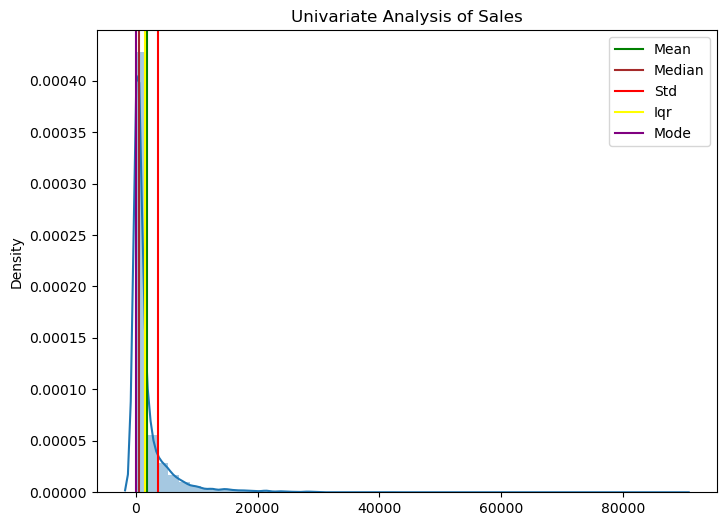

In [16]:
#Univariate Analysis

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

plot=sns.distplot(x=df['Sales'])

# Add lines to represent the mean, median, standard deviation, and IQR of column 'Sales'
mean_val = df['Sales'].mean()
ax.axvline(mean_val, color='green', label='Mean')

median_val = df['Sales'].median()
ax.axvline(median_val, color='brown', label='Median')

std_val = df['Sales'].std()
ax.axvline(std_val, color='red', label='Std')

q1, q3 = df['Sales'].quantile([0.25, 0.75])
iqr_val = q3 - q1
ax.axvline(iqr_val, color='yellow',label='Iqr')

mode = df['Sales'].mode()[0]
ax.axvline(mode, color='purple', label='Mode')

ax.set_title('Univariate Analysis of Sales')

ax.legend()

plt.show()

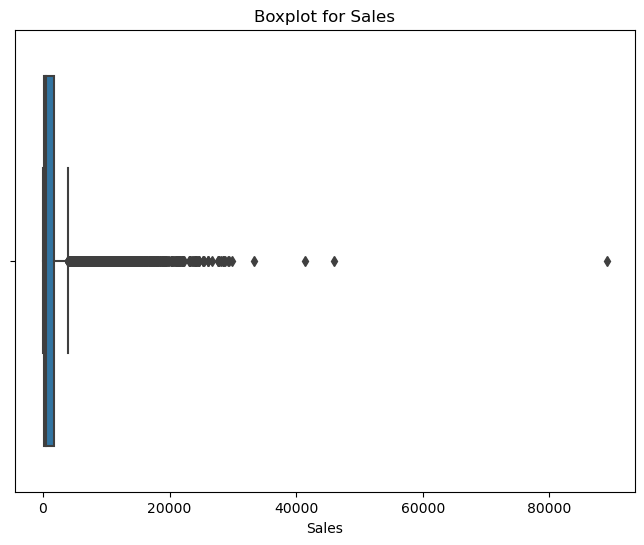

In [17]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
plot=sns.boxplot(x=df['Sales'])
plt.title('Boxplot for Sales')
plt.show()

In [18]:
q1, q3 = df['Sales'].quantile([0.25, 0.75])
iqr_val = q3 - q1
print('Mean:',df['Sales'].mean())
print('Median:',df['Sales'].median())
print('Std:',df['Sales'].std())
print('InterquartileRange:',iqr_val)
print('Skewness:',df['Sales'].skew())
print('Kurtosis:',df['Sales'].kurt() )

Mean: 1757.1002763915549
Median: 442.74
Std: 3576.433038594754
InterquartileRange: 1536.5433749999997
Skewness: 5.448947306467636
Kurtosis: 62.038854258367344


*A skewness value of 5.4 indicates that the distribution of the data is skewed to the right. 
This is because the skewness value is positive, and positive skewness indicates that the tail of the distribution is longer
on the right-hand side than on the left-hand side.*

*Therefore, the data is right-skewed or positively skewed. 
The skewness measures the degree and direction of the asymmetry of the distribution, rather than 
the position of the mean relative to the median.*

# Bivariate Analysis

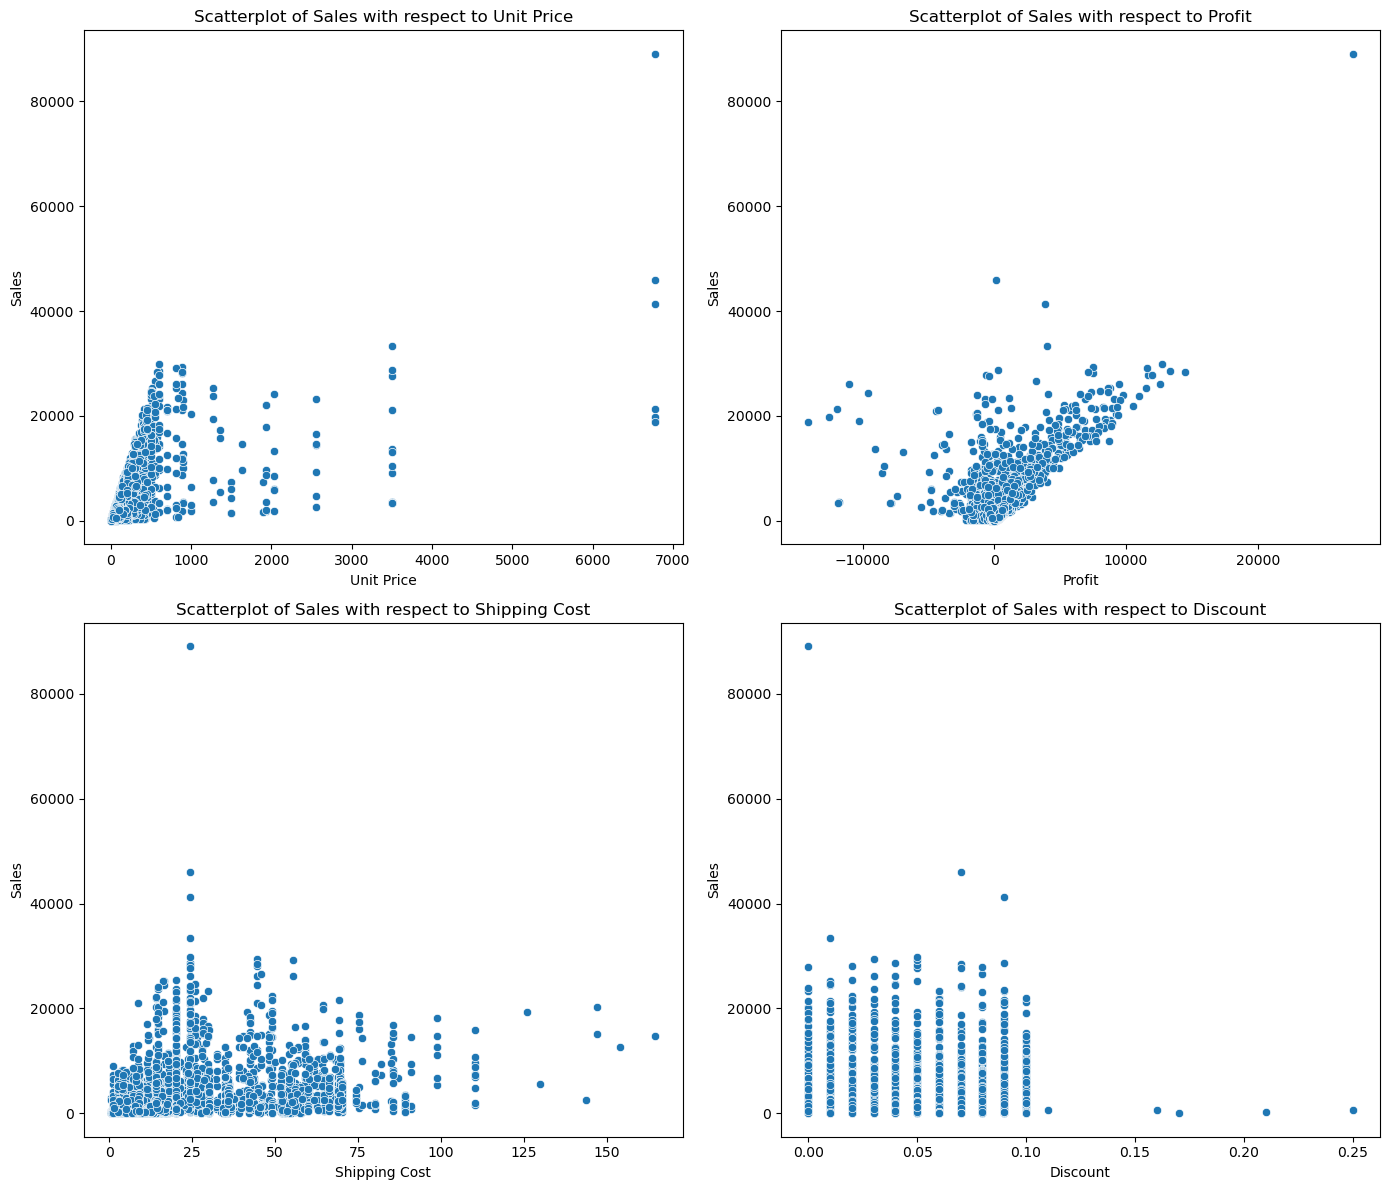

In [19]:
fig=plt.figure(figsize=(14,12))
cols=['Unit Price','Profit','Shipping Cost','Discount']
for i in range(len(cols)):
    ax=plt.subplot(2,2,i+1)
    plot=sns.scatterplot(x=df[cols[i]],y=df['Sales'])
    plt.title('Scatterplot of'+' '+'Sales with respect to'+' '+str(cols[i]))
plt.tight_layout() 

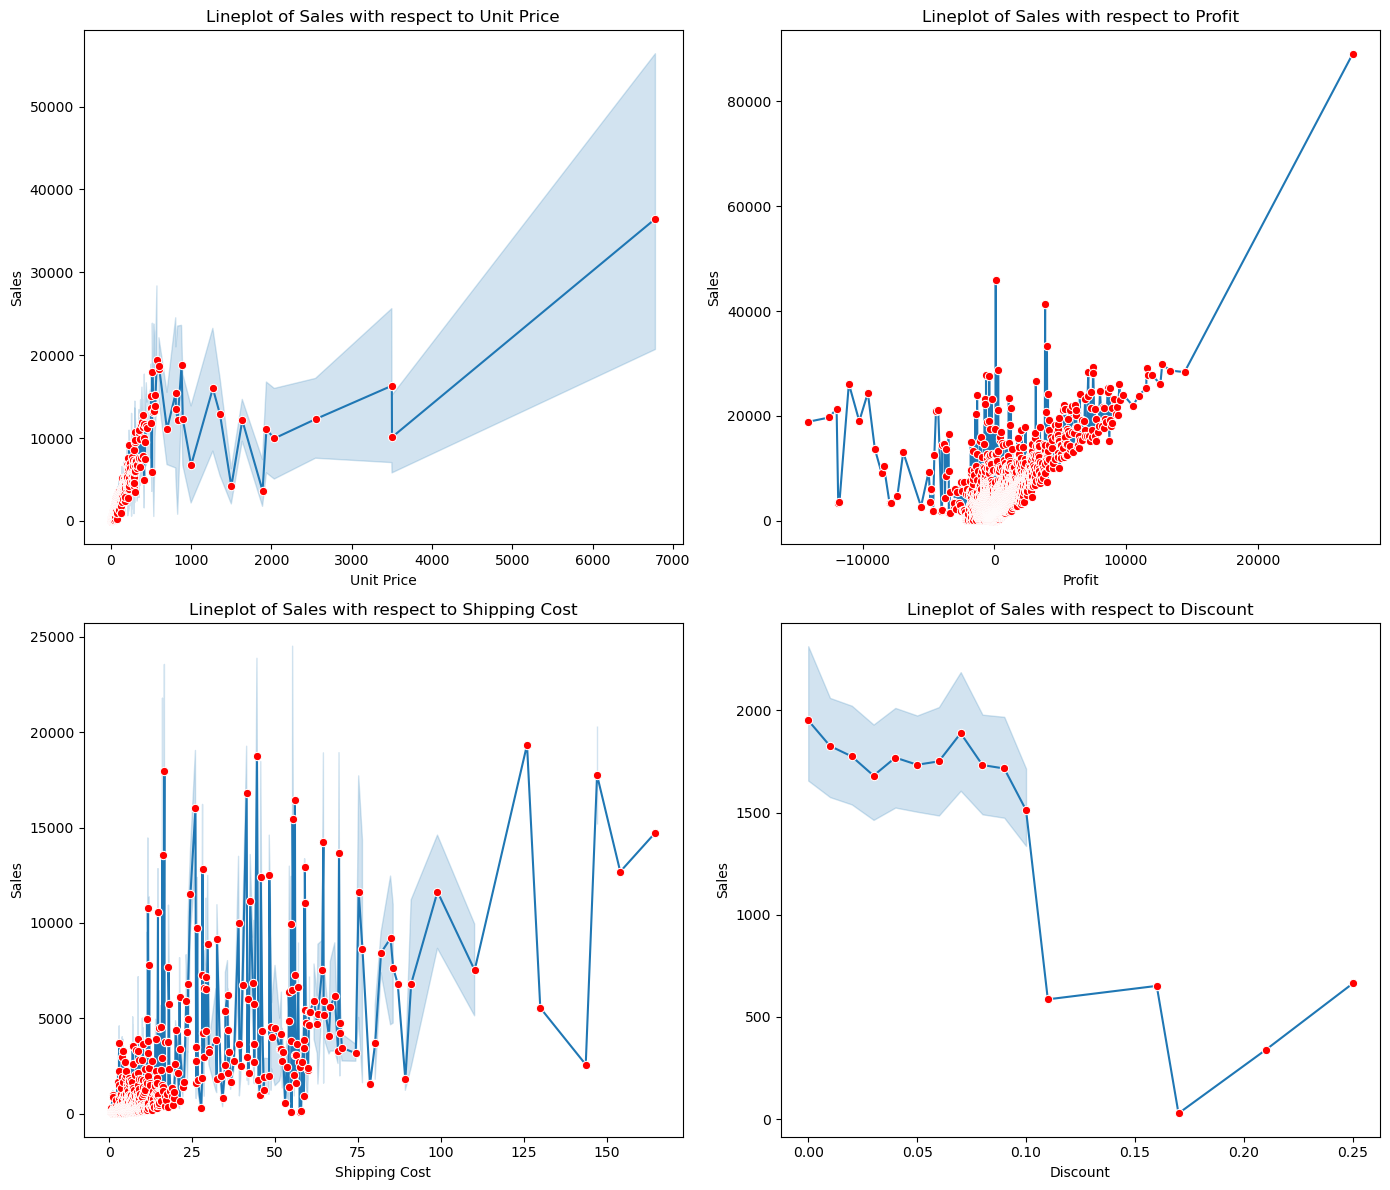

In [20]:
fig=plt.figure(figsize=(14,12))
cols=['Unit Price','Profit','Shipping Cost','Discount']
for i in range(len(cols)):
    ax=plt.subplot(2,2,i+1)
    plot=sns.lineplot(x=df[cols[i]],y=df['Sales'],marker='o',markerfacecolor='red')
    plt.title('Lineplot of'+' '+'Sales with respect to'+' '+str(cols[i]))
plt.tight_layout() 

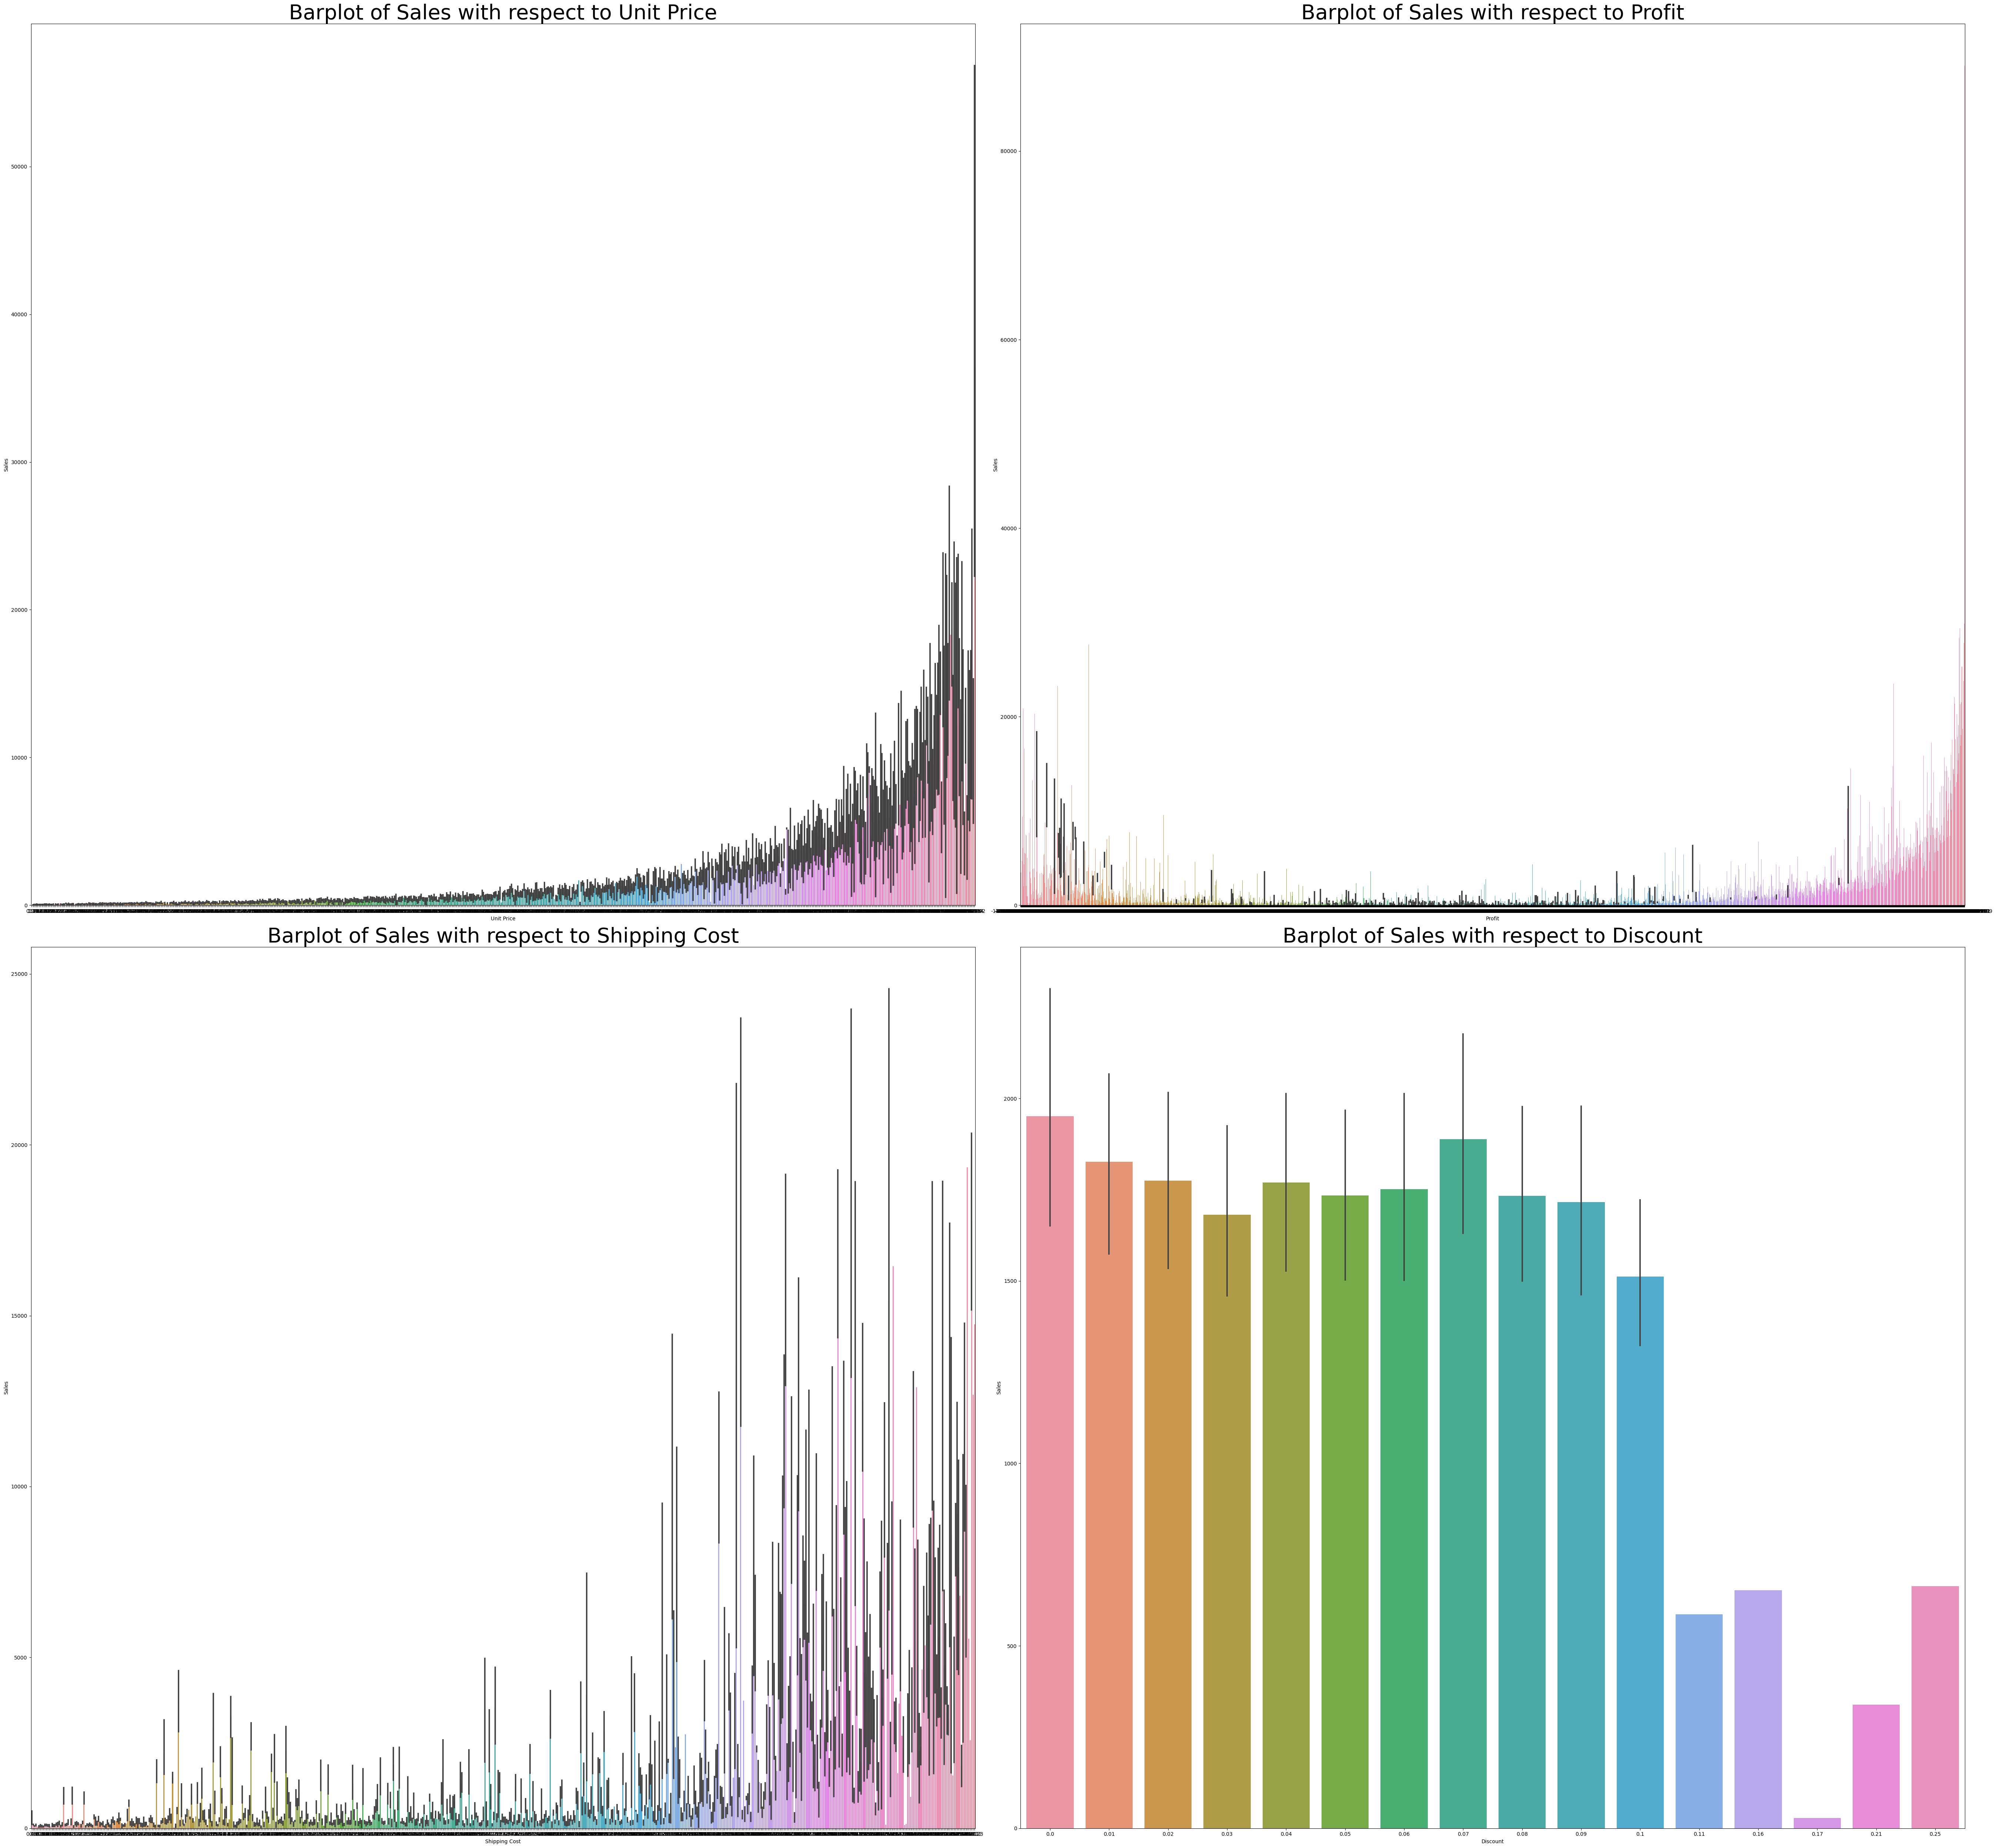

In [21]:
fig=plt.figure(figsize=(54,50))
cols=['Unit Price','Profit','Shipping Cost','Discount']
for i in range(len(cols)):
    ax=plt.subplot(2,2,i+1)
    plot=sns.barplot(x=df[cols[i]],y=df['Sales'])
    plt.title('Barplot of'+' '+'Sales with respect to'+' '+str(cols[i]),size=40)
plt.tight_layout() 

# Multivariate Analysis

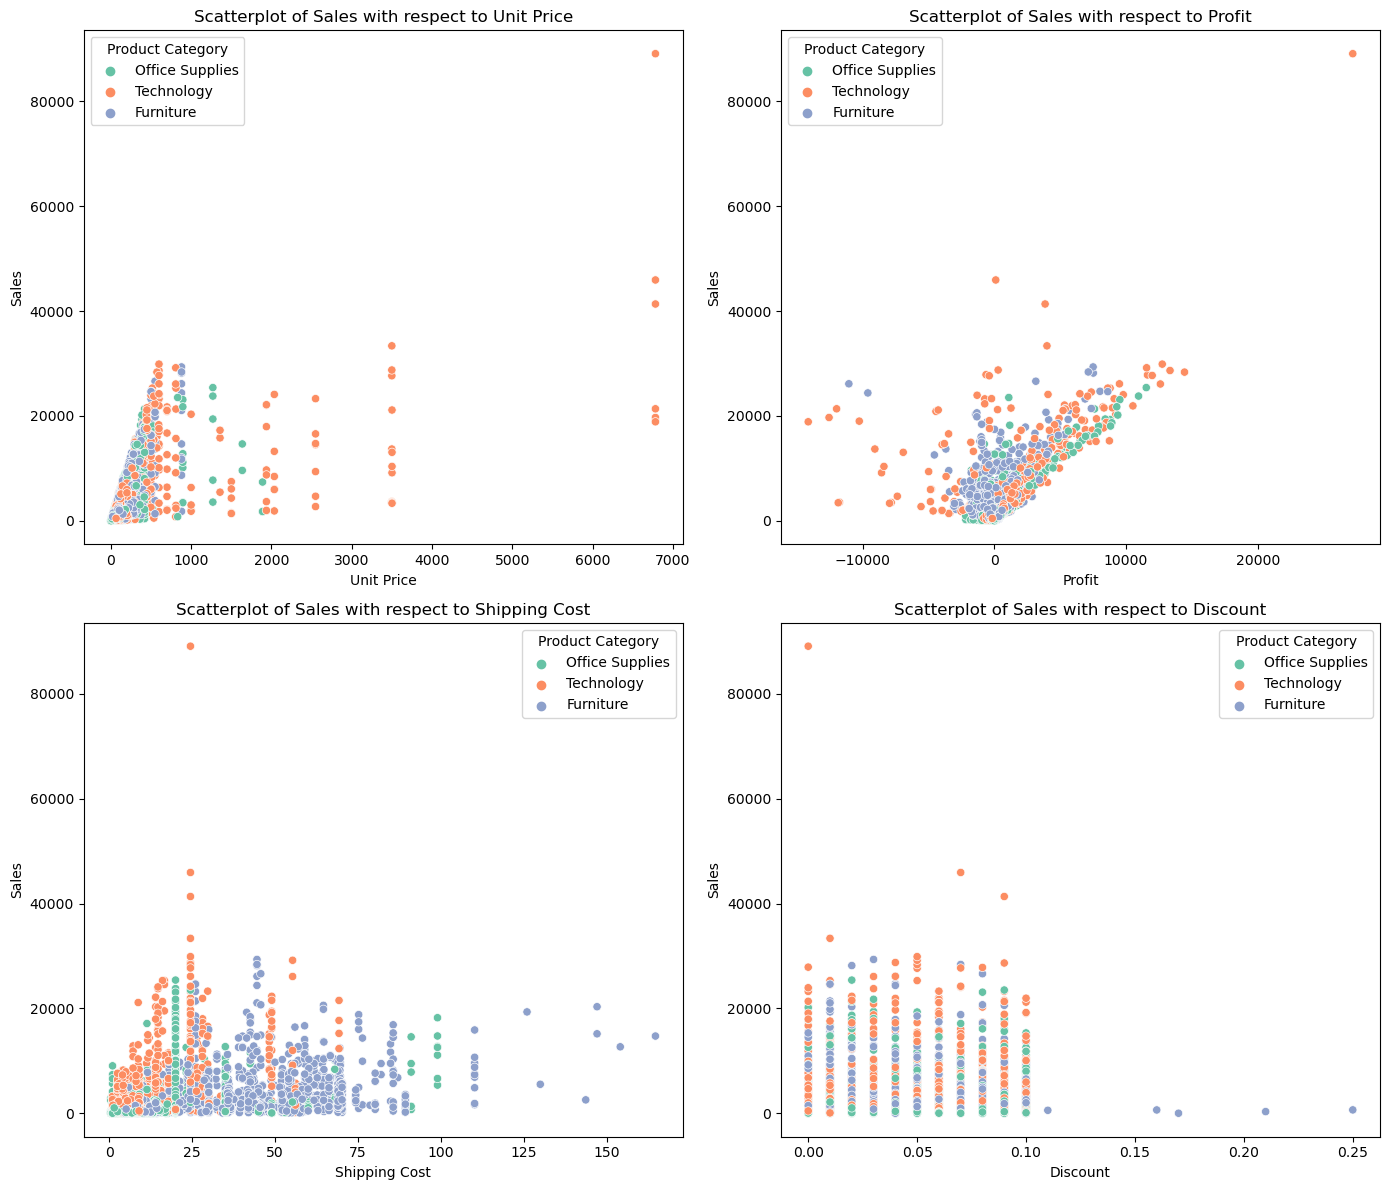

In [22]:
fig=plt.figure(figsize=(14,12))
cols=['Unit Price','Profit','Shipping Cost','Discount']
for i in range(len(cols)):
    ax=plt.subplot(2,2,i+1)
    plot=sns.scatterplot(x=df[cols[i]],y=df['Sales'],hue=df['Product Category'],palette='Set2')
    plt.title('Scatterplot of Sales with respect to'+' '+str(cols[i]))
plt.tight_layout() 

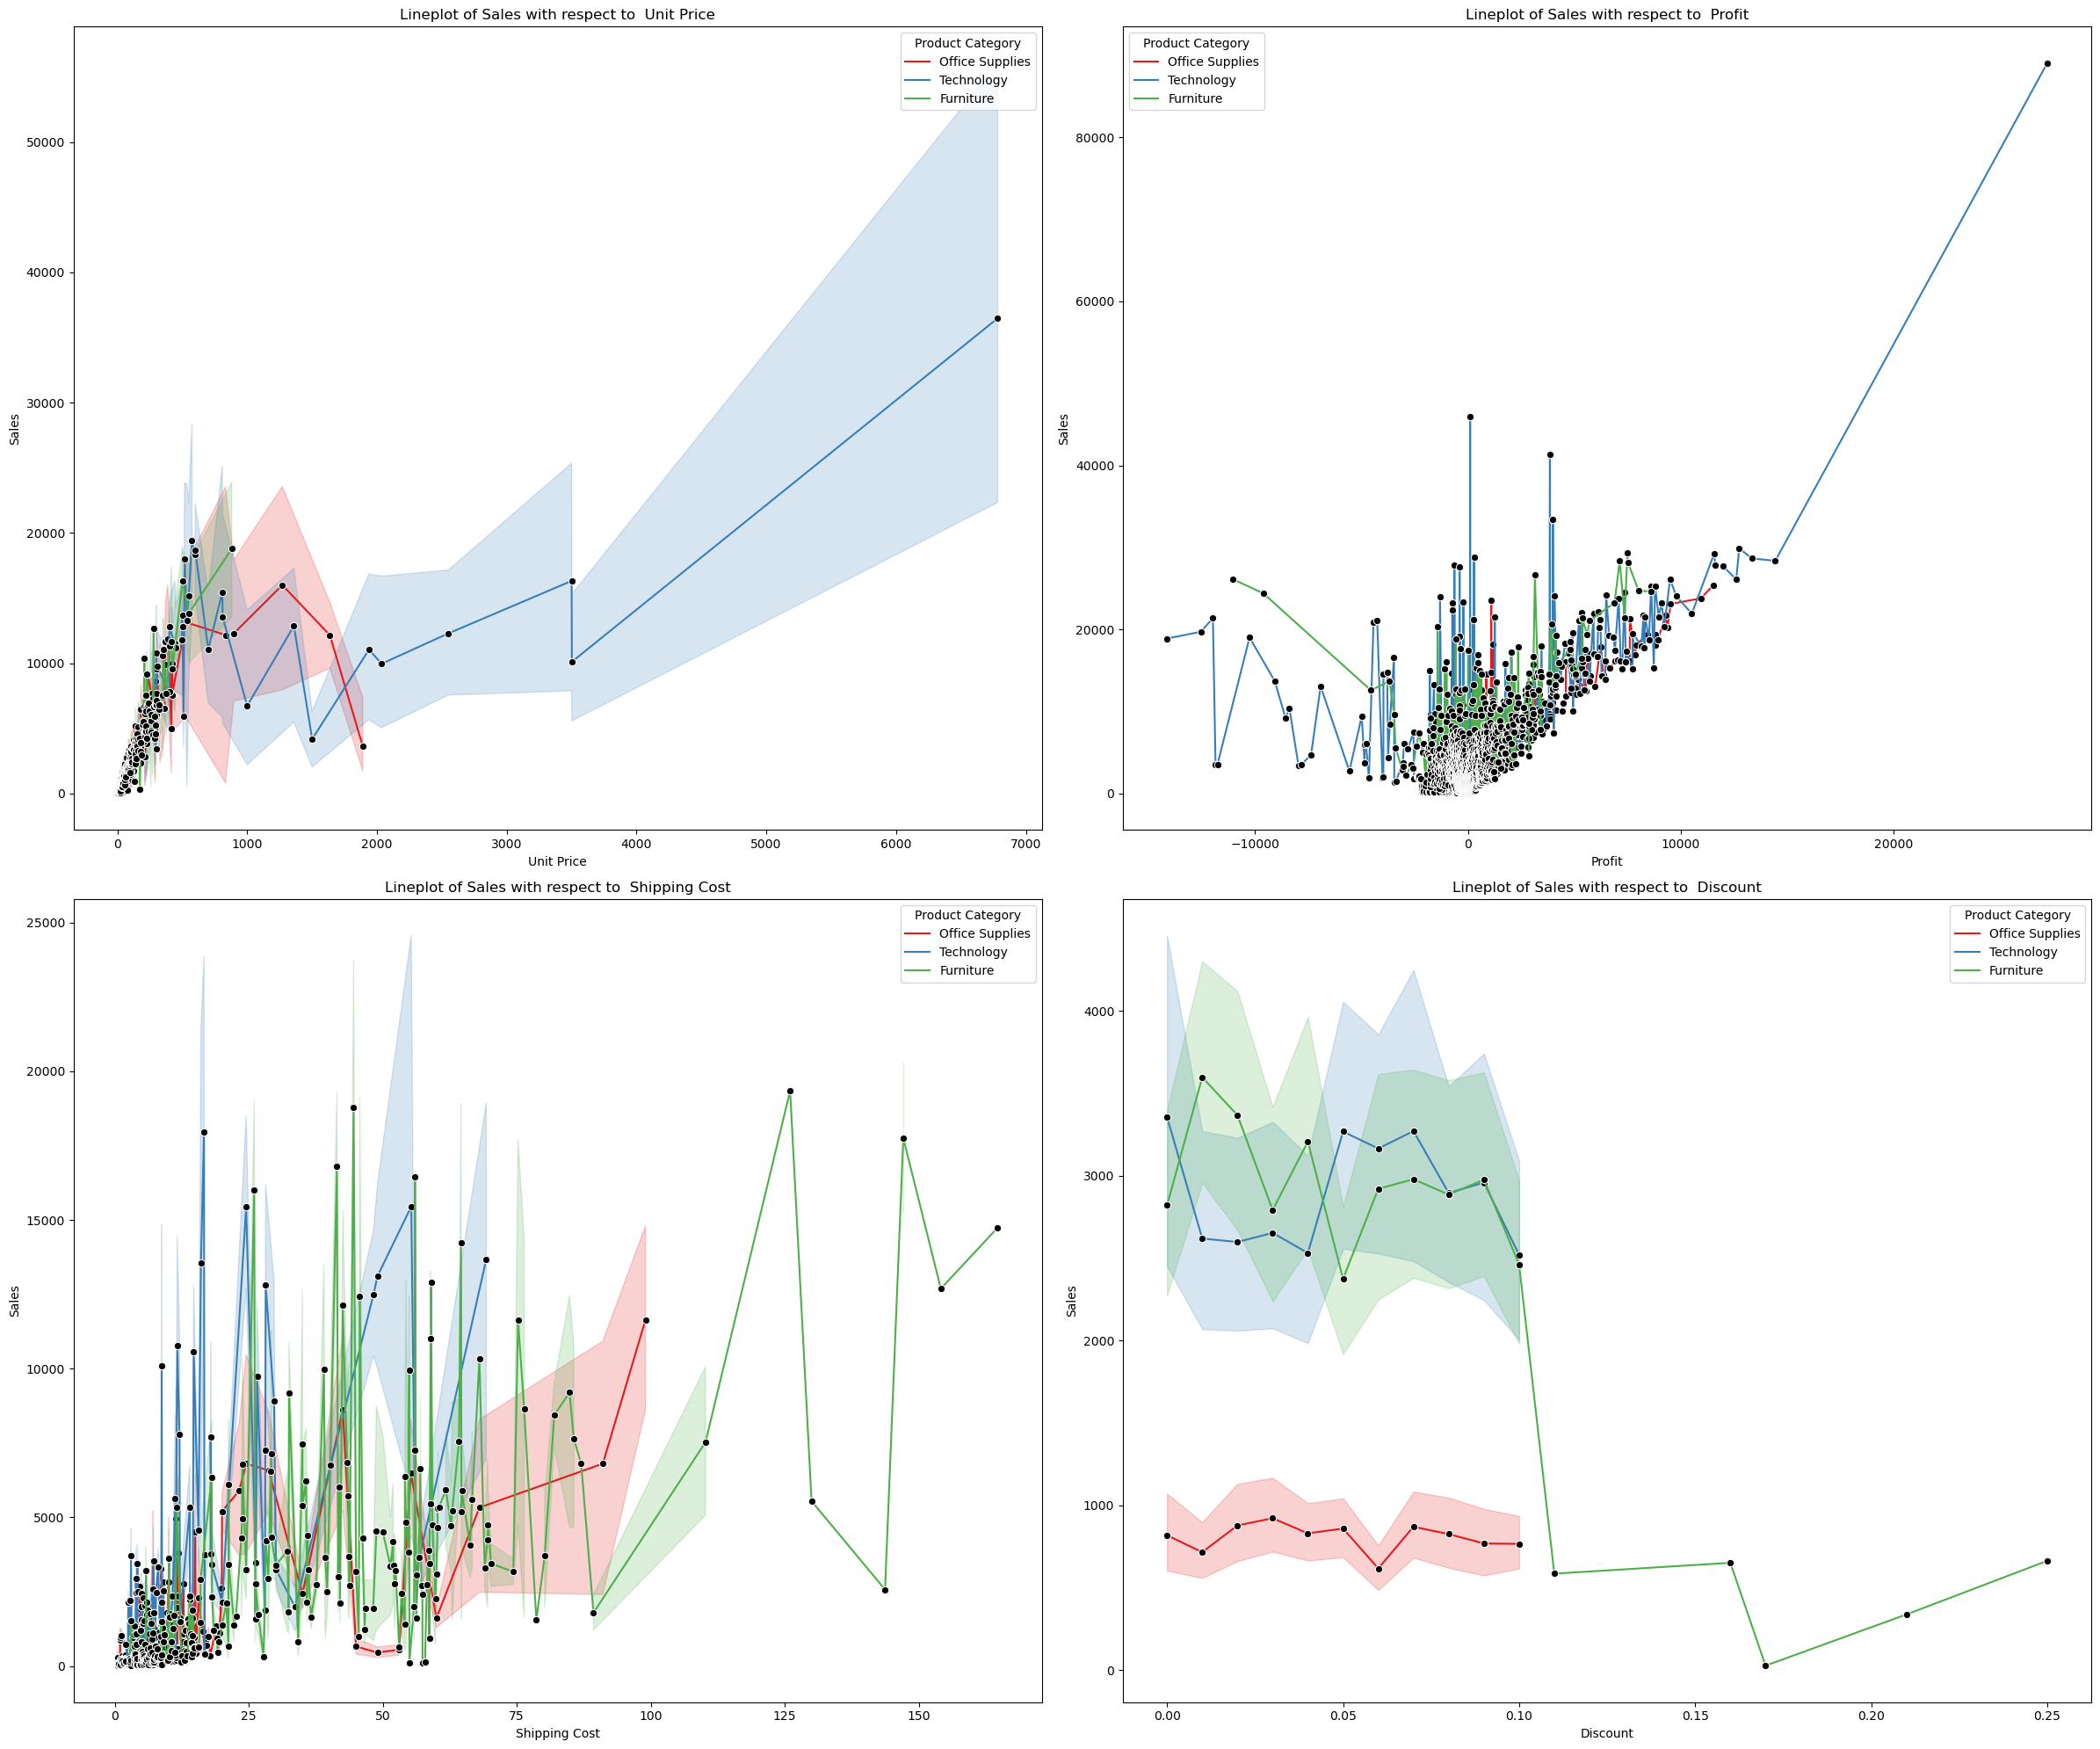

In [23]:
fig=plt.figure(figsize=(24,20))
cols=['Unit Price','Profit','Shipping Cost','Discount']
for i in range(len(cols)):
    ax=plt.subplot(2,2,i+1)
    plot=sns.lineplot(x=df[cols[i]],y=df['Sales'],marker='o',markerfacecolor='black',hue=df['Product Category'],palette='Set1')
    plt.title('Lineplot of Sales with respect to '+' '+str(cols[i]))
plt.tight_layout() 

C:\Users\supri\AppData\Local\Temp\ipykernel_5400\2032835446.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


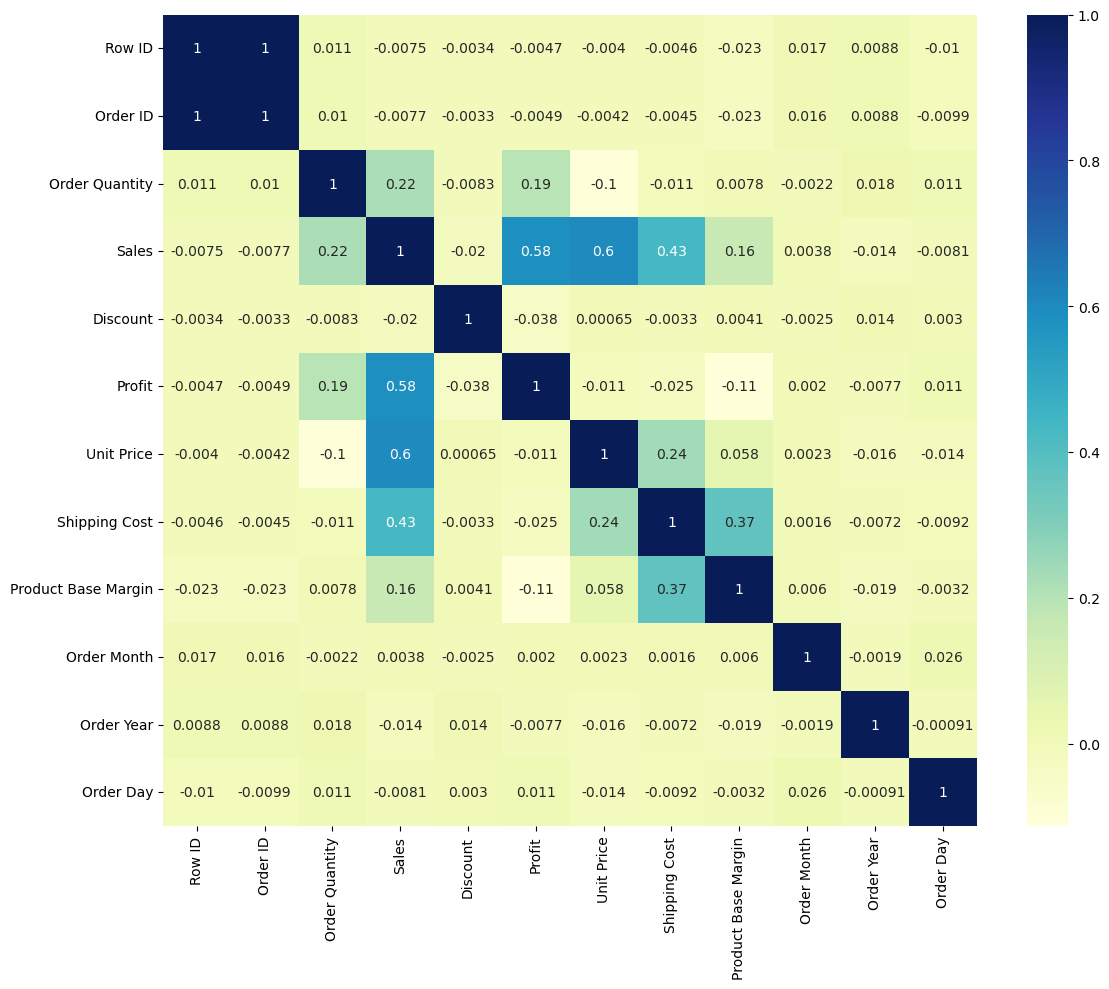

In [24]:
fig=plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')
plt.tight_layout() 

In [25]:
df.skew().sort_values(ascending=False)

C:\Users\supri\AppData\Local\Temp\ipykernel_5400\4024944668.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values(ascending=False)


Unit Price             14.116740
Sales                   5.448947
Profit                  3.718699
Shipping Cost           2.588632
Product Base Margin     0.559400
Discount                0.076052
Order Day               0.039552
Order Year              0.032958
Order ID                0.004582
Row ID                  0.000764
Order Month            -0.013000
Order Quantity         -0.018605
dtype: float64

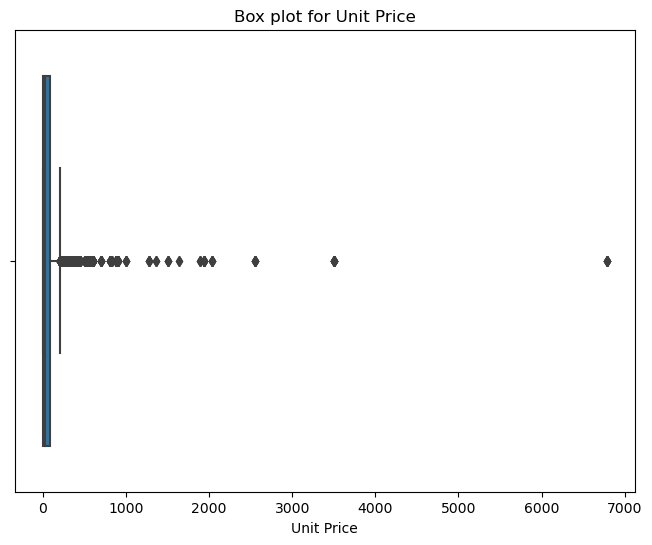

In [26]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.boxplot(x=df['Unit Price'])
plt.title('Box plot for Unit Price')
plt.show()

In [27]:
#Highy positively skewed distribution, lets try to apply log transformation and boxcox transformation
df['UP_log']=df['Unit Price'].apply(lambda x: np.log(x))
values = df['Unit Price'].values
transformed_values,l = boxcox(values)
df['UP_bcx'] = transformed_values

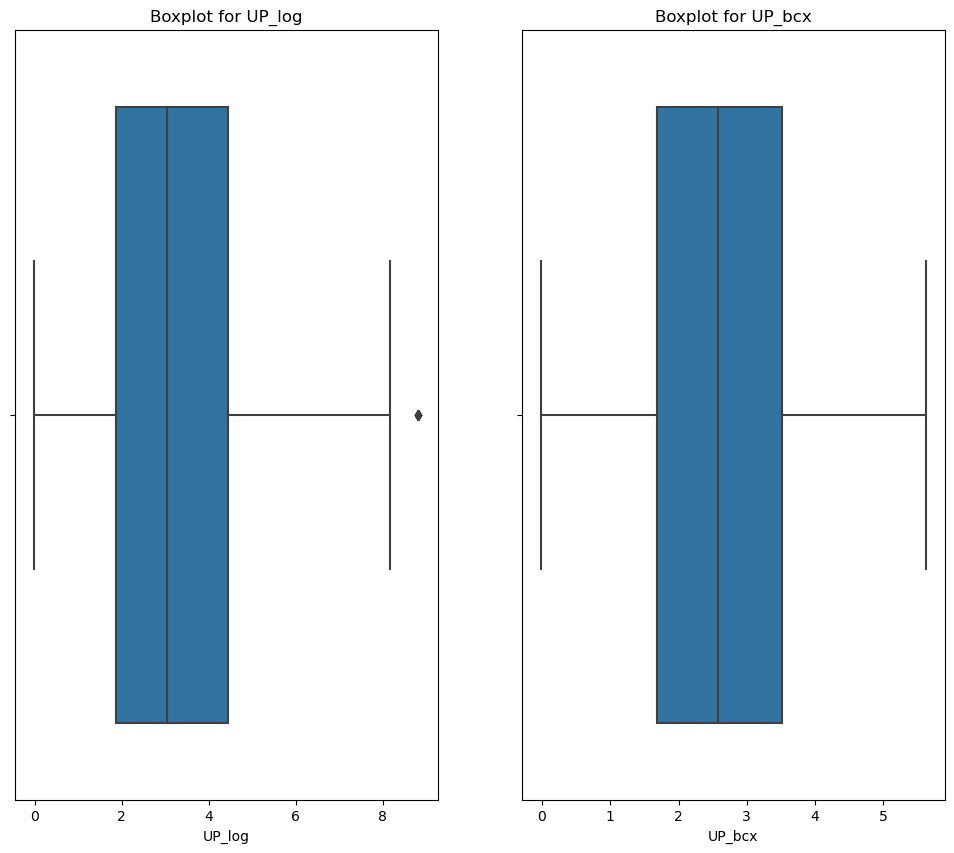

In [28]:
fig=plt.figure(figsize=(12,10))
cols=['UP_log','UP_bcx']
for i in range(len(cols)):
    ax=plt.subplot(1,2,i+1)
    plot=sns.boxplot(x=df[cols[i]])
    plt.title('Boxplot for'+' '+cols[i])

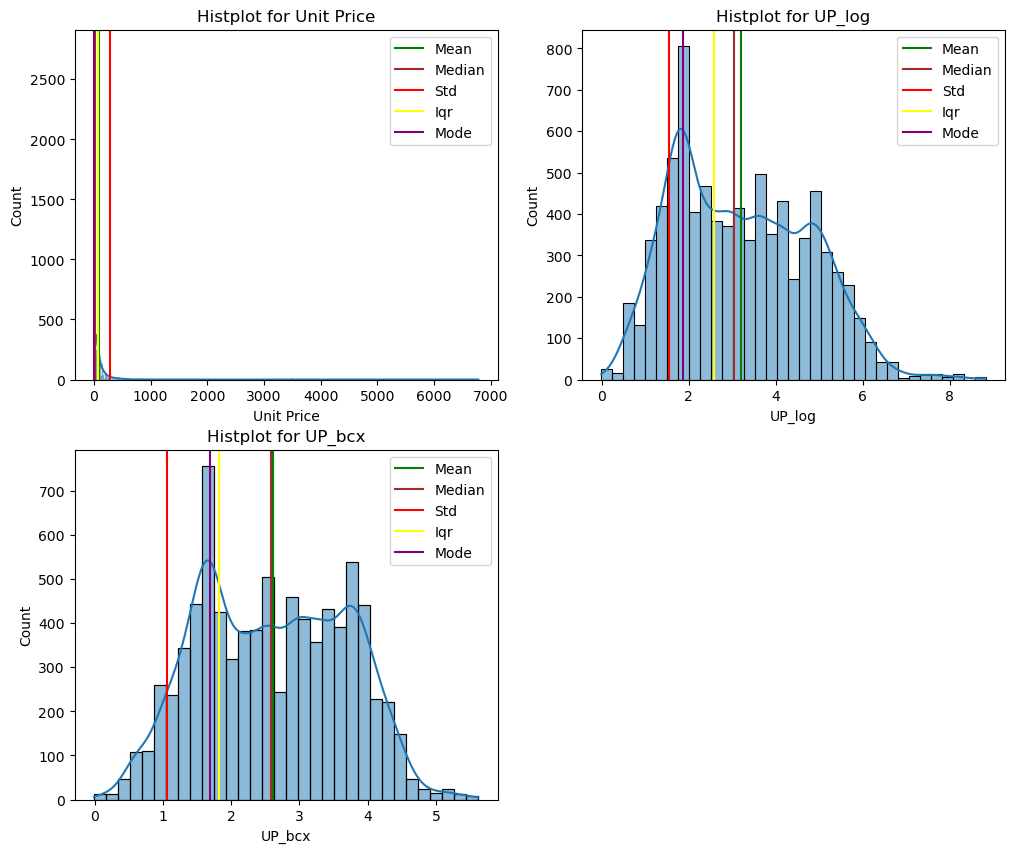

In [29]:
#Lets Plot histplot
fig=plt.figure(figsize=(12,10))
cols=['Unit Price','UP_log','UP_bcx']
for i in range(len(cols)):
    ax=plt.subplot(2,2,i+1)
    plot=sns.histplot(x=df[cols[i]],kde=True)
    mean=df[cols[i]].mean()
    ax.axvline(mean,color='green',label='Mean')
    median=df[cols[i]].median()
    ax.axvline(median,color='brown',label='Median')
    std=df[cols[i]].std()
    ax.axvline(std,color='red',label='Std')
    q1, q3 = df[cols[i]].quantile([0.25, 0.75])
    iqr=q3-q1
    ax.axvline(iqr,color='yellow',label='Iqr')
    mode=df[cols[i]].mode()[0]
    ax.axvline(mode,color='purple',label='Mode')
    ax.legend()
    plt.title('Histplot for'+' '+cols[i])

In [30]:
print("Skewness of Unit Price before transformation:", df['Unit Price'].skew())
print("Skewness of Unit Price after log transformation:", df['UP_log'].skew())
print("Skewness of Unit Price after boxcox transformation:", df['UP_bcx'].skew())
print("Kurtosis of Unit Price before transformation:", df['Unit Price'].kurt())
print("Kurtosis of Unit Price after log transformation:", df['UP_log'].kurt())
print("Kurtosis of Unit Price after boxcox transformation:", df['UP_bcx'].kurt())

Skewness of Unit Price before transformation: 14.116739901491194
Skewness of Unit Price after log transformation: 0.35131438229542344
Skewness of Unit Price after boxcox transformation: 0.05241259141347588
Kurtosis of Unit Price before transformation: 270.1851627609341
Kurtosis of Unit Price after log transformation: -0.6211292480973634
Kurtosis of Unit Price after boxcox transformation: -0.9170592843162719


In [31]:
df[['Unit Price','UP_log','UP_bcx']].describe()

Unit Price       UP_log       UP_bcx
count  8336.000000  8336.000000  8336.000000
mean     88.716087     3.207091     2.605360
std     291.195650     1.546617     1.066389
min       0.990000    -0.010050    -0.010056
25%       6.480000     1.868721     1.687189
50%      20.980000     3.043570     2.581671
75%      85.990000     4.454231     3.512056
max    6783.020000     8.822178     5.619143

In [32]:
df[['Unit Price','UP_log','UP_bcx']].median()

Unit Price    20.980000
UP_log         3.043570
UP_bcx         2.581671
dtype: float64

*The logarithmic transformation has reduced the skewness from 14 to 0.35, and the Box-Cox transformation has reduced the skewness even further to 0.05, 
which is much closer to 0, indicating a more symmetrical distribution.*

*Moreover, after applying the transformations, the mean and median values have become closer, 
indicating less skewness in the data. Additionally, the kurtosis values have reduced from 271 to -0.6 
after the logarithmic transformation and to -0.9 after the Box-Cox transformation, indicating a flatter distribution.*

*Overall, it seems like applying the transformations has significantly improved the distribution of the unit_price column, 
making it more suitable for further analysis or modeling.*

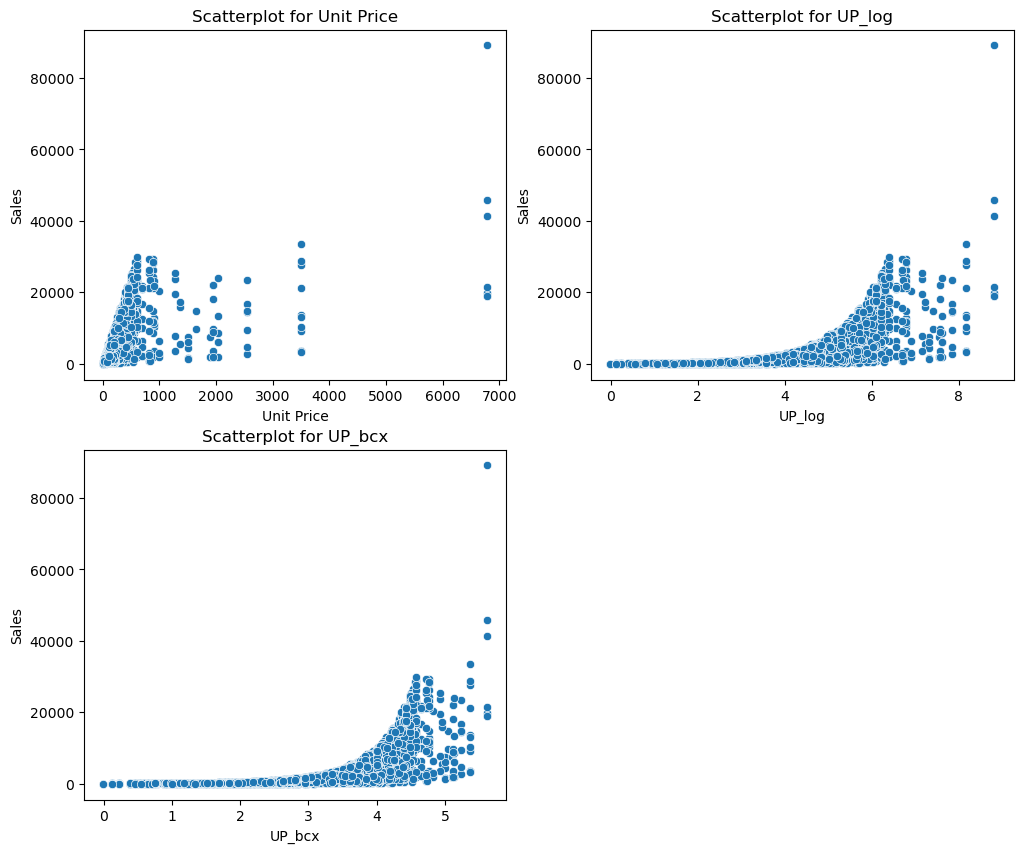

In [34]:
#Scatterplot between Unit Price and Product Base Margin
fig=plt.figure(figsize=(12,10))
cols=['Unit Price','UP_log','UP_bcx']
for i in range(len(cols)):
    ax=plt.subplot(2,2,i+1)
    plot=sns.scatterplot(x=df[cols[i]],y=df['Sales'])
    plt.title('Scatterplot for'+' '+cols[i])

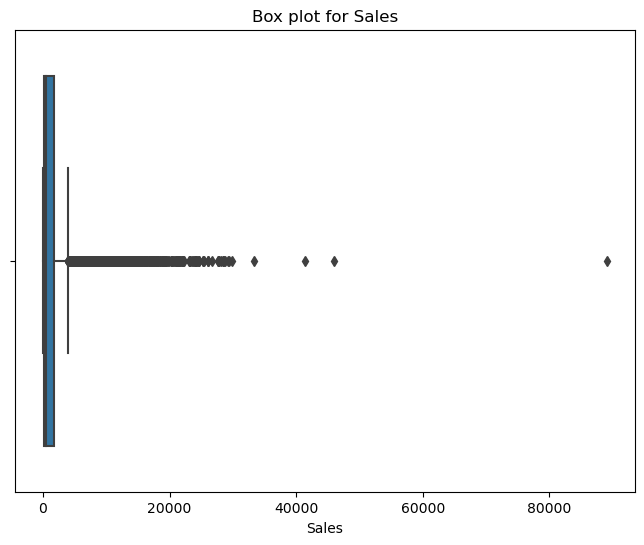

In [35]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.boxplot(x=df['Sales'])
plt.title('Box plot for Sales')
plt.show()

In [36]:
#Skewed towards right, lets try to apply log transformation and boxcox transformation
df['Sales_log']=df['Sales'].apply(lambda x: np.log(x))
values = df['Sales'].values
transformed_values,l = boxcox(values)
df['Sales_bcx'] = transformed_values

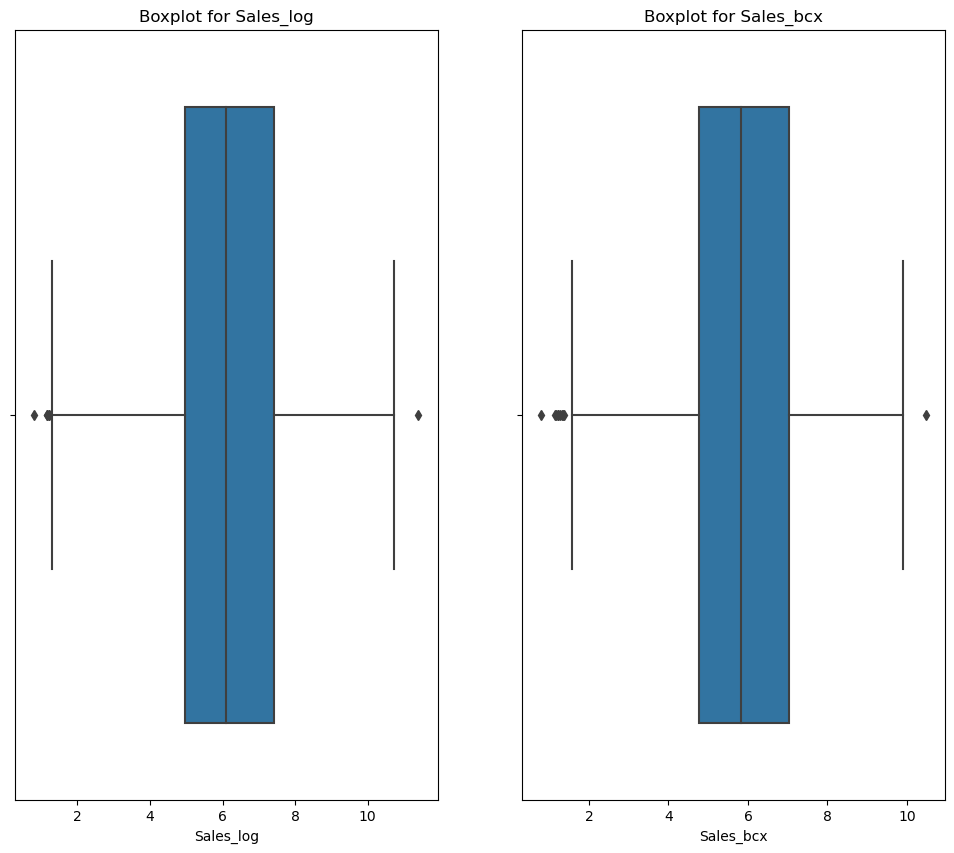

In [37]:
fig=plt.figure(figsize=(12,10))
cols=['Sales_log','Sales_bcx']
for i in range(len(cols)):
    ax=plt.subplot(1,2,i+1)
    plot=sns.boxplot(x=df[cols[i]])
    plt.title('Boxplot for'+' '+cols[i])

Can observe few outliers from above boxplot

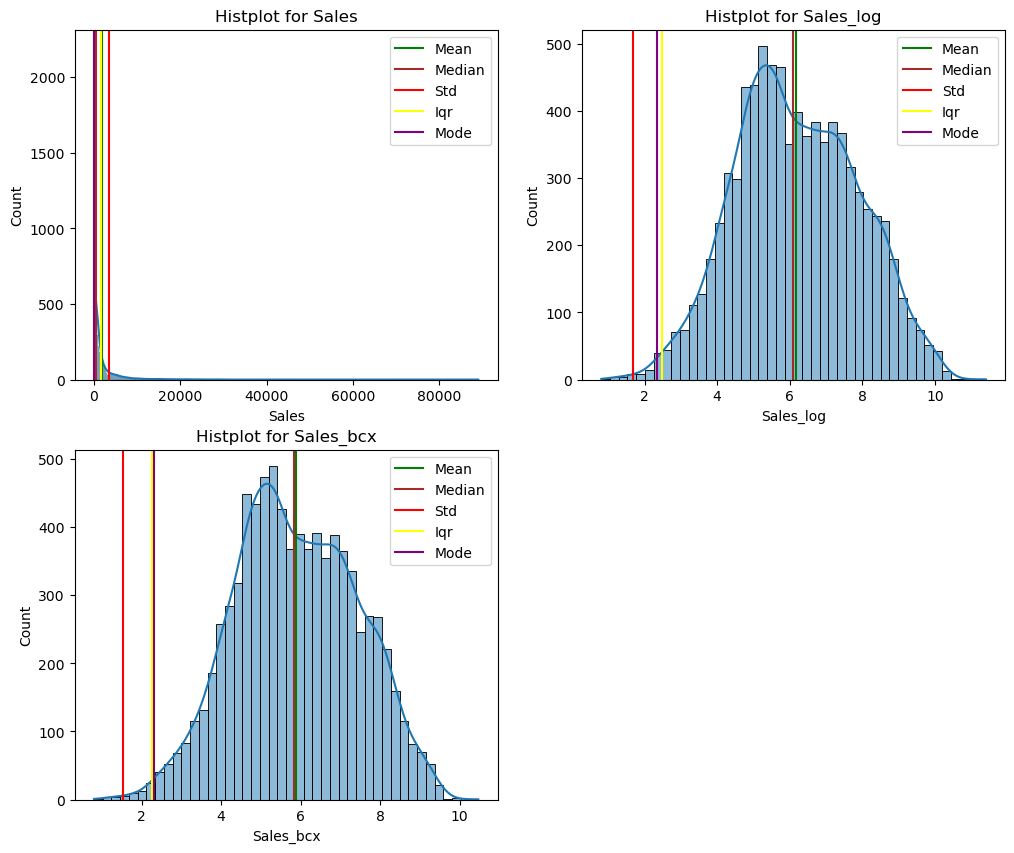

In [38]:
#Lets Plot histplot
fig=plt.figure(figsize=(12,10))
cols=['Sales','Sales_log','Sales_bcx']
for i in range(len(cols)):
    ax=plt.subplot(2,2,i+1)
    plot=sns.histplot(x=df[cols[i]],kde=True)
    mean=df[cols[i]].mean()
    ax.axvline(mean,color='green',label='Mean')
    median=df[cols[i]].median()
    ax.axvline(median,color='brown',label='Median')
    std=df[cols[i]].std()
    ax.axvline(std,color='red',label='Std')
    q1, q3 = df[cols[i]].quantile([0.25, 0.75])
    iqr=q3-q1
    ax.axvline(iqr,color='yellow',label='Iqr')
    mode=df[cols[i]].mode()[0]
    ax.axvline(mode,color='purple',label='Mode')
    ax.legend()
    plt.title('Histplot for'+' '+cols[i])

In [39]:
print("Skewness of Sales before transformation:", df['Sales'].skew())
print("Skewness of Sales after log transformation:", df['Sales_log'].skew())
print("Skewness of Sales after boxcox transformation:", df['Sales_bcx'].skew())
print("Kurtosis of Sales before transformation:", df['Sales'].kurt())
print("Kurtosis of Sales after log transformation:", df['Sales_log'].kurt())
print("Kurtosis of Sales after boxcox transformation:", df['Sales_bcx'].kurt())

Skewness of Sales before transformation: 5.448947306467636
Skewness of Sales after log transformation: 0.0609132660214976
Skewness of Sales after boxcox transformation: 0.004247240150690009
Kurtosis of Sales before transformation: 62.038854258367344
Kurtosis of Sales after log transformation: -0.511668995422113
Kurtosis of Sales after boxcox transformation: -0.4970104271019187


In [40]:
df[['Sales','Sales_log','Sales_bcx']].describe()

Sales    Sales_log    Sales_bcx
count   8336.000000  8336.000000  8336.000000
mean    1757.100276     6.184948     5.885537
std     3576.433039     1.677102     1.526951
min        2.240000     0.806476     0.801584
25%      141.971625     4.955627     4.774722
50%      442.740000     6.092983     5.821050
75%     1678.515000     7.425665     7.024421
max    89061.050000    11.397077    10.470151

In [41]:
df[['Sales','Sales_log','Sales_bcx']].median()

Sales        442.740000
Sales_log      6.092983
Sales_bcx      5.821050
dtype: float64

As we observed few outliers for sales in boxplot lets check them.

# IQR Method to check outliers

In [43]:
Q1 = np.percentile(df['Sales_bcx'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Sales_bcx'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print("75th quartile range",Q3)
print("25th quartile range",Q1)
print('InterquartileRange:',IQR)
#print((df1['Sales_bcx'] < (Q1 - 1.5 * IQR)) | (df1['Sales_bcx'] > (Q3 + 1.5 * IQR)))
outliers=[]
for i in df['Sales_bcx'] : 
        if (i<(Q1 - 1.5 * IQR) or i>(Q3 + 1.5 * IQR)):
            outliers.append(i)
print(outliers)

75th quartile range 7.024514512812084
25th quartile range 4.7746966307251855
InterquartileRange: 2.249817882086899
[0.8015843608993741, 1.276762556301006, 1.3138646144794535, 1.2182932312510195, 1.3620401005335008, 10.470151222366203, 1.1621622725896588, 1.215418786053564, 1.334442837291878, 1.1529940793432174]


C:\Users\supri\AppData\Local\Temp\ipykernel_5400\3634085065.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Sales_bcx'], 25,
C:\Users\supri\AppData\Local\Temp\ipykernel_5400\3634085065.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['Sales_bcx'], 75,


# Z-score method to check outliers

In [44]:
outliers = []
threshold = 3  #Can be set on observations done
mean = np.mean(df['Sales_bcx'])
std = df['Sales_bcx'].std()
for i in df['Sales_bcx']:
    z_score = (i-mean)/std
    if (np.abs(z_score) > threshold):
        outliers.append(i)
print(outliers)

[0.8015843608993741, 1.276762556301006, 1.2182932312510195, 10.470151222366203, 1.1621622725896588, 1.215418786053564, 1.1529940793432174]


# Handling outliers

In [45]:
#Approach 1
#Mapping outliers to some threshold value on highest and lowest ends
P90=np.percentile(df['Sales_bcx'], 90,interpolation = 'midpoint')
P10=np.percentile(df['Sales_bcx'], 10,interpolation = 'midpoint')
print('P90',P90)
print('P10',P10)

P90 7.966104374811463
P10 3.9731424711819736


C:\Users\supri\AppData\Local\Temp\ipykernel_5400\2017787452.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  P90=np.percentile(df['Sales_bcx'], 90,interpolation = 'midpoint')
C:\Users\supri\AppData\Local\Temp\ipykernel_5400\2017787452.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  P10=np.percentile(df['Sales_bcx'], 10,interpolation = 'midpoint')


In [46]:
o=[0.8015843608993741, 1.276762556301006, 1.3138646144794535, 1.2182932312510195, 1.3620401005335008, 
   1.1621622725896588, 1.215418786053564, 1.334442837291878, 1.1529940793432174]
df["Sales_bcx_map"] = np.where(df["Sales_bcx"].isin(o),P10,df['Sales_bcx']) #mapping using np.where()
df["Sales_bcx_map"] = np.where(df["Sales_bcx"]==10.470151222366203,P90,df['Sales_bcx']) #mapping using np.where()

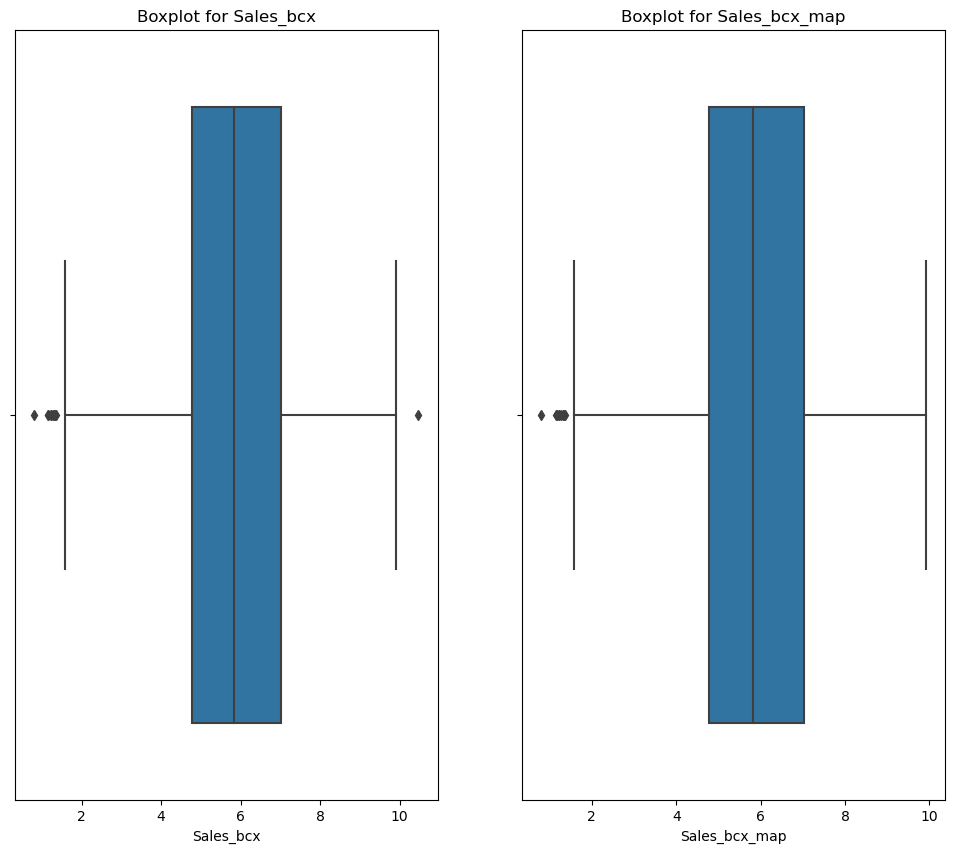

In [47]:
fig=plt.figure(figsize=(12,10))
cols=['Sales_bcx','Sales_bcx_map']
for i in range(len(cols)):
    ax=plt.subplot(1,2,i+1)
    plot=sns.boxplot(x=df[cols[i]])
    plt.title('Boxplot for'+' '+cols[i])

In [48]:
#Handling outliers approach2
#Removing the outlier---we might loose some information, since we have less outliers lets check
df2 = df[~((df['Sales_bcx'] < (Q1 - 1.5 * IQR)) |(df['Sales_bcx'] > (Q3 + 1.5 * IQR)))] #IQR
df3 = df[~((df['Sales_bcx']).isin([0.8015843608993741, 1.276762556301006, 1.2182932312510195, 10.470151222366203, 1.1621622725896588, 1.215418786053564, 1.1529940793432174])) ] #z-score

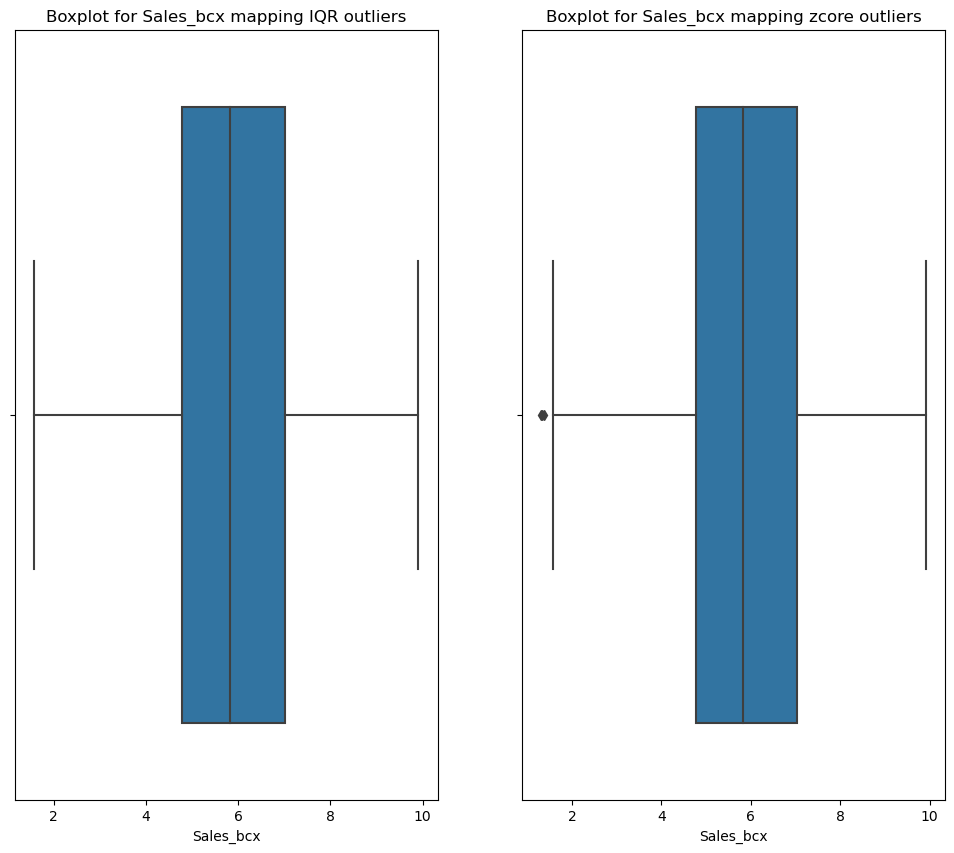

In [49]:
fig=plt.figure(figsize=(12,10))
ax = plt.subplot(121)
plot1=sns.boxplot(x=df2['Sales_bcx'])
ax.set_title('Boxplot for'+' '+'Sales_bcx mapping IQR outliers')
ax = plt.subplot(122)
plot1=sns.boxplot(x=df3['Sales_bcx'])
ax.set_title('Boxplot for'+' '+'Sales_bcx mapping zcore outliers')
plt.show()

In [50]:
#Handling outliers approach3
#mapping to some value i.e., mode or median
'''do not map with mean as they are affected by outliers i.e.,
If the outliers with extremely large values are removed then the value of mean will decrease.
If the outliers with extremely small values are removed then the value of mean will increase.
'''
m = df['Sales_bcx'].mode()[0]
print('Mode:',m)
o_iqr=[0.8015843608993741, 1.276762556301006, 1.3138646144794535, 1.2182932312510195, 1.3620401005335008, 
       10.470151222366203, 1.1621622725896588,1.215418786053564, 1.334442837291878, 1.1529940793432174]
def mapvalue(inp,m,o_iqr):
    if inp in o_iqr:
        return m
    else:
        return inp
df['Sales_bcx_mwm'] =df['Sales_bcx'].apply(lambda x:mapvalue(x,m,o_iqr) )

Mode: 2.3082742047212674


In [51]:
m = df['Sales_bcx'].mode()[0]
print('Mode:',m)
o_zscore=[0.8015843608993741, 1.276762556301006, 1.2182932312510195, 10.470151222366203, 1.1621622725896588, 
          1.215418786053564, 1.1529940793432174]
def mapvalue(inp,m,o_zscore):
    if inp in o_zscore:
        return m
    else:
        return inp
df['Sales_bcx_mwz'] =df['Sales_bcx'].apply(lambda x:mapvalue(x,m,o_zscore) )

Mode: 2.3082742047212674


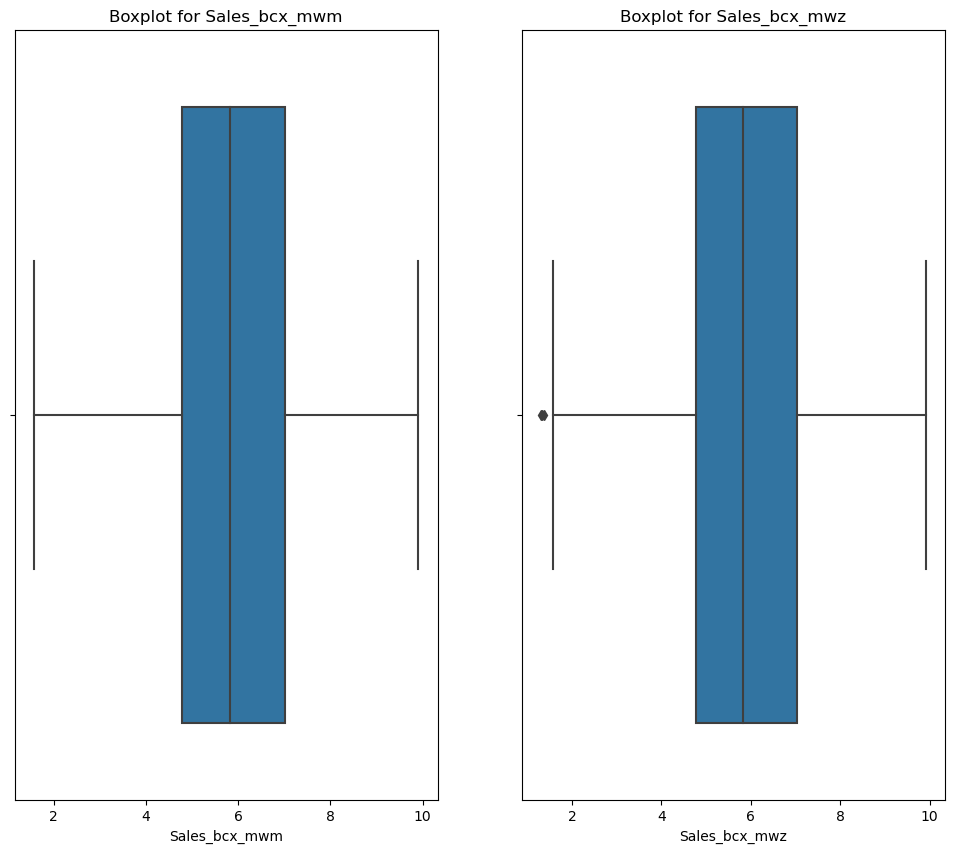

In [52]:
fig=plt.figure(figsize=(12,10))
ax = plt.subplot(121)
plot1=sns.boxplot(x=df['Sales_bcx_mwm'])
ax.set_title('Boxplot for'+' '+'Sales_bcx_mwm')
ax = plt.subplot(122)
plot1=sns.boxplot(x=df['Sales_bcx_mwz'])
ax.set_title('Boxplot for'+' '+'Sales_bcx_mwz')
plt.show()

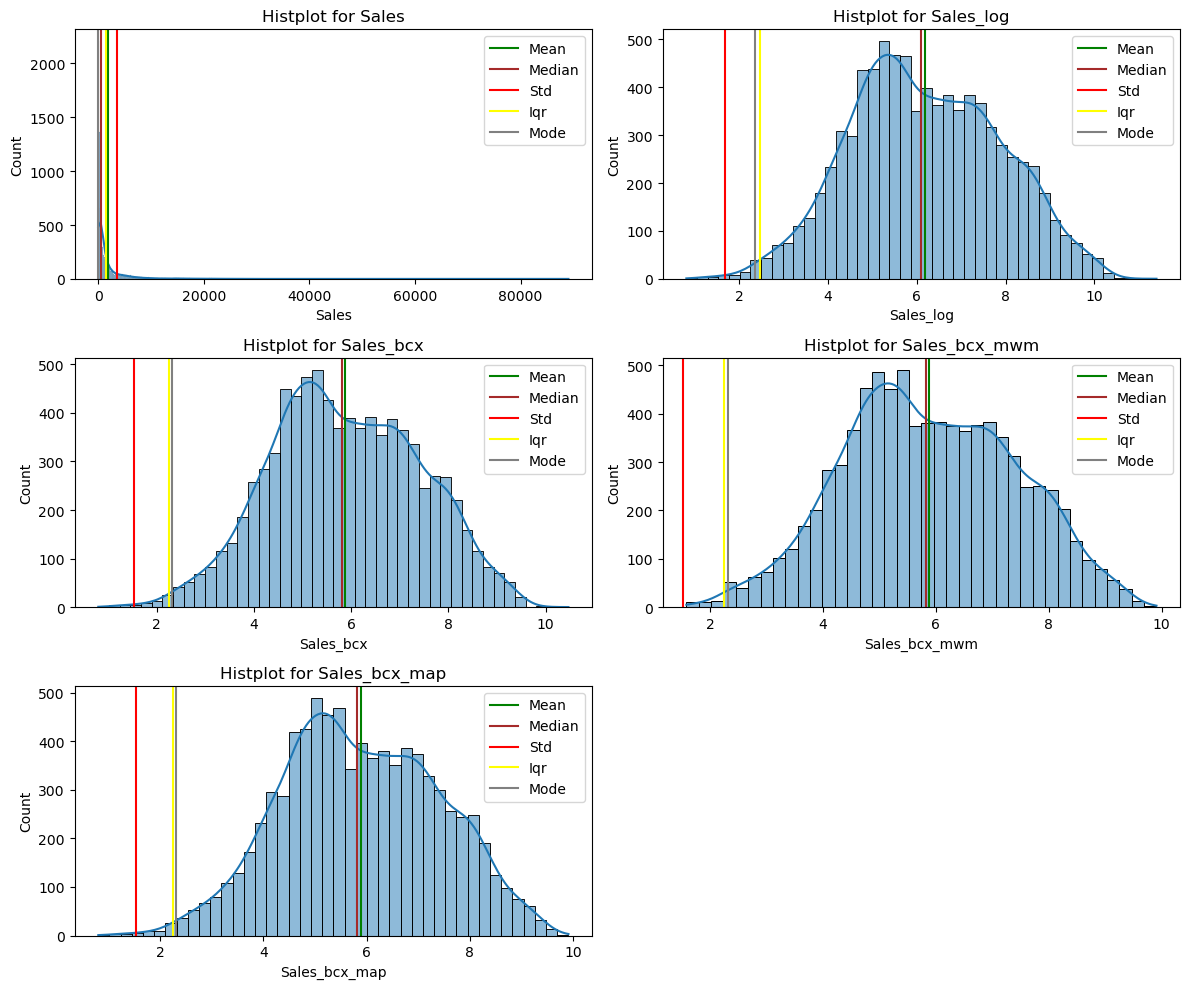

In [53]:
#Lets Plot histplot
fig=plt.figure(figsize=(12,10))
cols=['Sales','Sales_log','Sales_bcx','Sales_bcx_mwm','Sales_bcx_map']
for i in range(len(cols)):
    ax=plt.subplot(3,2,i+1)
    plot=sns.histplot(x=df[cols[i]],kde=True)
    mean=df[cols[i]].mean()
    ax.axvline(mean,color='green',label='Mean')
    median=df[cols[i]].median()
    ax.axvline(median,color='brown',label='Median')
    std=df[cols[i]].std()
    ax.axvline(std,color='red',label='Std')
    q1, q3 = df[cols[i]].quantile([0.25, 0.75])
    iqr=q3-q1
    ax.axvline(iqr,color='yellow',label='Iqr')
    mode=df[cols[i]].mode()[0]
    ax.axvline(mode,color='grey',label='Mode')
    ax.legend()
    plt.title('Histplot for'+' '+cols[i])
plt.tight_layout()

In [54]:
df[['Sales','Sales_log','Sales_bcx','Sales_bcx_mwm','Sales_bcx_map']].skew()

Sales            5.448947
Sales_log        0.060913
Sales_bcx        0.004247
Sales_bcx_mwm    0.016499
Sales_bcx_map    0.001895
dtype: float64

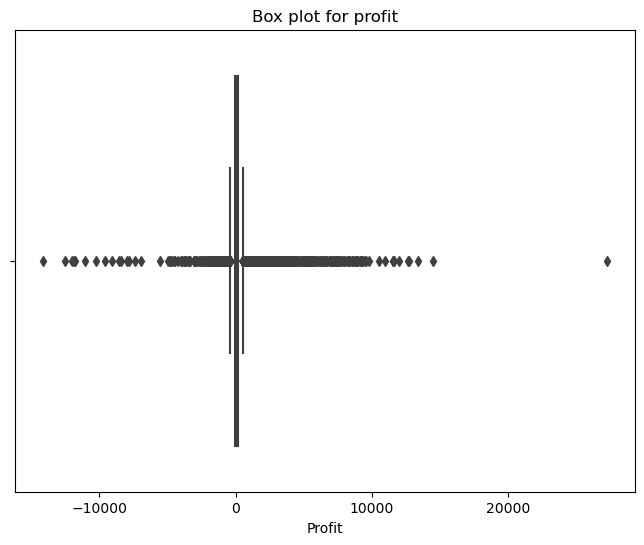

In [55]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.boxplot(x=df['Profit'])
plt.title('Box plot for profit')
plt.show()

C:\Users\supri\AppData\Local\Temp\ipykernel_5400\1919446378.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(x=df['Profit'])


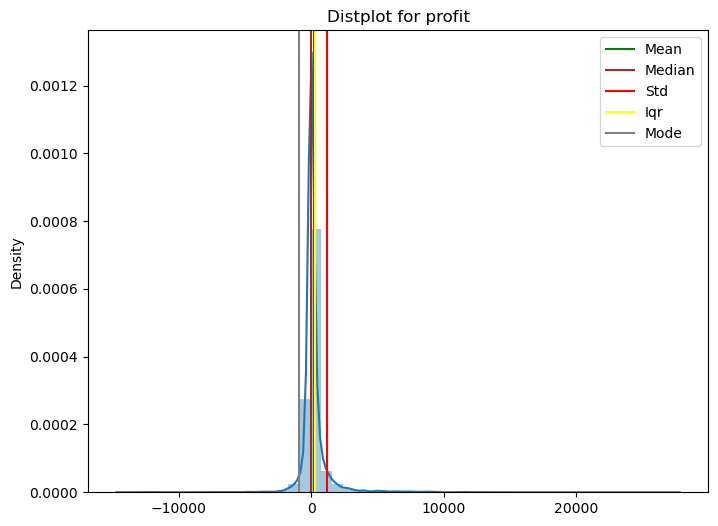

In [56]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.distplot(x=df['Profit'])
mean=df['Profit'].mean()
ax.axvline(mean,color='green',label='Mean')
median=df['Profit'].median()
ax.axvline(median,color='brown',label='Median')
std=df['Profit'].std()
ax.axvline(std,color='red',label='Std')
q1, q3 = df['Profit'].quantile([0.25, 0.75])
iqr=q3-q1
ax.axvline(iqr,color='yellow',label='Iqr')
mode=df['Profit'].mode()[0]
ax.axvline(mode,color='grey',label='Mode')
ax.legend()
plt.title('Distplot for profit')
plt.show()

In [57]:
df['Profit_log'] = df['Profit'].apply(lambda x: np.log(x))

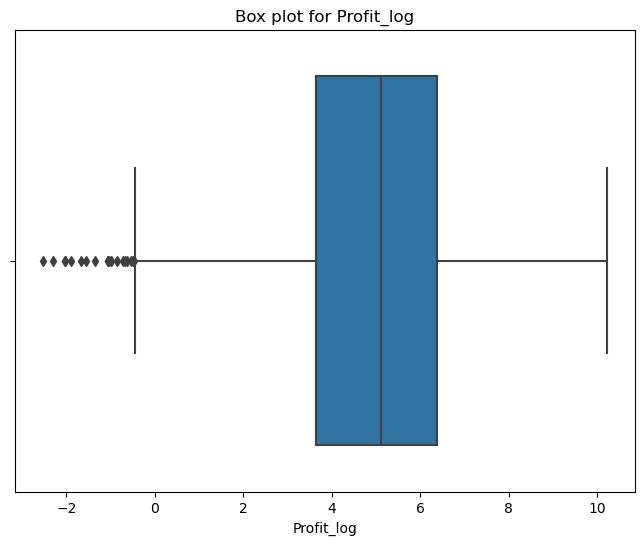

In [58]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.boxplot(x=df['Profit_log'])
plt.title('Box plot for Profit_log')
plt.show()

C:\Users\supri\AppData\Local\Temp\ipykernel_5400\324080045.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(x=df['Profit_log'])


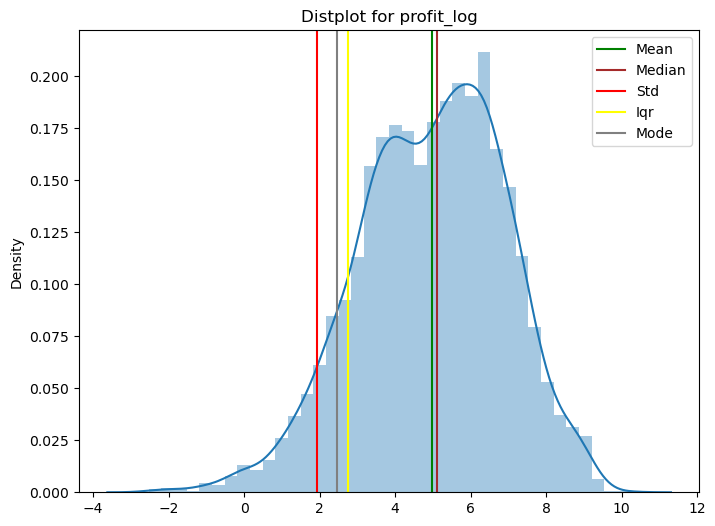

In [59]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.distplot(x=df['Profit_log'])
mean=df['Profit_log'].mean()
ax.axvline(mean,color='green',label='Mean')
median=df['Profit_log'].median()
ax.axvline(median,color='brown',label='Median')
std=df['Profit_log'].std()
ax.axvline(std,color='red',label='Std')
q1, q3 = df['Profit_log'].quantile([0.25, 0.75])
iqr=q3-q1
ax.axvline(iqr,color='yellow',label='Iqr')
mode=df['Profit_log'].mode()[0]
ax.axvline(mode,color='grey',label='Mode')
ax.legend()
plt.title('Distplot for profit_log')
plt.show()

In [60]:
df['Profit_log'].skew() #left skewed

-0.32262212474894

In [61]:
df['Profit_log']=df['Profit'].apply(lambda x: np.log(x) if x>0 else (np.log(abs(x)))*-1)

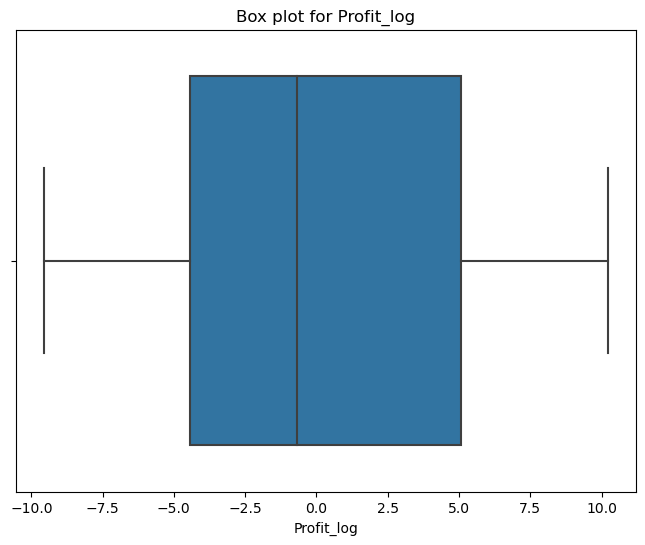

In [62]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.boxplot(x=df['Profit_log'])
plt.title('Box plot for Profit_log')
plt.show()

C:\Users\supri\AppData\Local\Temp\ipykernel_5400\324080045.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(x=df['Profit_log'])


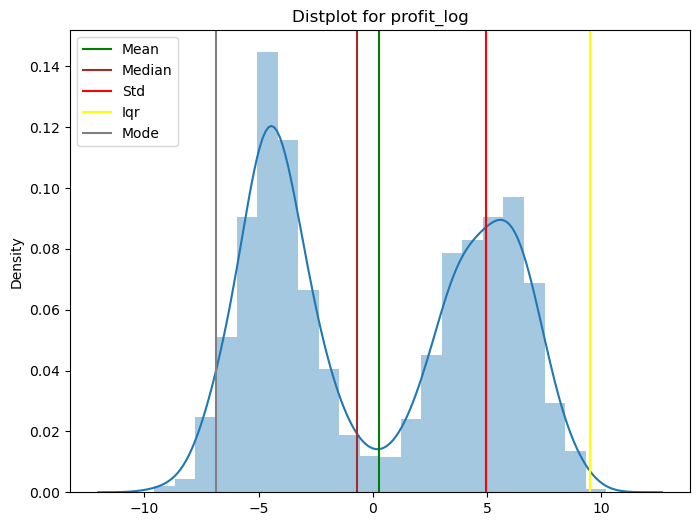

In [63]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.distplot(x=df['Profit_log'])
mean=df['Profit_log'].mean()
ax.axvline(mean,color='green',label='Mean')
median=df['Profit_log'].median()
ax.axvline(median,color='brown',label='Median')
std=df['Profit_log'].std()
ax.axvline(std,color='red',label='Std')
q1, q3 = df['Profit_log'].quantile([0.25, 0.75])
iqr=q3-q1
ax.axvline(iqr,color='yellow',label='Iqr')
mode=df['Profit_log'].mode()[0]
ax.axvline(mode,color='grey',label='Mode')
ax.legend()
plt.title('Distplot for profit_log')
plt.show()

In [64]:
df['Profit_log'].skew()

0.08438233234419268

Lets check if handling outliers will work

In [65]:
Q1 = np.percentile(df['Profit'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Profit'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print("75th quartile range",Q3)
print("25th quartile range",Q1)
print('InterquartileRange:',IQR)
#print((df1['Sales_bcx'] < (Q1 - 1.5 * IQR)) | (df1['Sales_bcx'] > (Q3 + 1.5 * IQR)))
outliers=[]
for i in df['Profit'] : 
        if (i<(Q1 - 1.5 * IQR) or i>(Q3 + 1.5 * IQR)):
            outliers.append(i)
print(outliers)

75th quartile range 159.875
25th quartile range -83.23
InterquartileRange: 243.10500000000002
[1198.971, 782.91, -481.041, -547.61, -1766.01, 3424.22, 1115.694, -1759.58, -846.73, 737.94, 884.08, 2825.15, 707.15, 3387.35, 2332.395, 2176.19, 1269.05, 5322.14, 1068.48, 1260.51, -1274.02, 545.49, -1059.2, 3122.78, -478.22, 948.79, 678.26, -1414.41, 950.68, 1240.25, -533.2320000000001, -1003.58, 1881.5759999999998, -2816.3379, -541.87, -514.32, 1465.866, 10951.306499999999, 7416.43, -11053.6, 636.18, 1459.791, 1951.3, 753.61, -3755.0331, -549.27, 1215.441, 1374.948, 2509.52, 1166.93, -517.47, 822.4019999999999, 2699.67, 1292.44, 8793.539, 813.83, 6907.613, 801.72, -539.59, 900.06, 1280.19, -996.67, 965.48, 5353.19, 2808.219, -998.9370000000001, -743.96, -599.54, 8417.567000000001, -1975.26, 2113.95, -1775.83, 822.888, -2088.68, 2155.41, 752.37, 2969.81, 5386.32, 1864.6560000000002, 1026.07, 1765.48, 4938.78, -807.89, 630.28, 1443.3509999999999, 2763.1259999999997, -488.312, -1129.96, -803.

C:\Users\supri\AppData\Local\Temp\ipykernel_5400\2086728531.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Profit'], 25,
C:\Users\supri\AppData\Local\Temp\ipykernel_5400\2086728531.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['Profit'], 75,


In [66]:
outliers = []
threshold = 3  #Can be set on observations done
mean = np.mean(df['Profit'])
std = df['Profit'].std()
for i in df['Profit']:
    z_score = (i-mean)/std
    if (np.abs(z_score) > threshold):
        outliers.append(i)
print(outliers)

[5322.14, 10951.306499999999, 7416.43, -11053.6, -3755.0331, 8793.539, 6907.613, 5353.19, 8417.567000000001, 5386.32, 4938.78, -5572.3935, -4437.91, 4604.79, 3909.33, 8504.47, 9097.645, 8157.7, 7513.88, -3687.6510000000003, -3404.24, 4875.89, -3461.121, 7434.48, 5455.96, 4456.2525, 6523.257, 9791.041000000001, 3793.7030000000004, 3829.63, 8291.08, -3476.8593, -3465.072, 5034.15, 5183.04, 7251.92, 5065.507, 4963.89, 5603.95, -3971.0627999999997, 8918.735499999999, 5485.15, 6079.63, 4031.62, 3858.2774999999997, 8788.81, 8249.86, 4127.79, 8022.94, 4276.73, 6888.36, 9224.1, 6463.34, 4914.24, 3982.2245000000003, -9611.91, 11535.282, 3992.52, 5365.43, 11630.146, 6670.409, 5045.3025, 5638.75, 4833.27, 4160.88, 6279.18, 6247.95, 4842.3735, -4017.6164999999996, 8822.2775, 7606.0, 4822.42, 9527.471500000001, 5711.96, 4801.82, 5528.502, 7917.7585, 5050.1, 7360.43, 3857.5719999999997, 4407.44, 10521.33, 9373.961500000001, -11769.17, 27220.69, 3857.43, 13340.26, 4722.77, 7497.55, 7176.12, 5713.53, 

In [67]:
#Mapping outliers to some threshold value on highest and lowest ends
P90=np.percentile(df['Profit'], 90)
P10=np.percentile(df['Profit'], 10)
print('P90',P90)
print('P10',P10)

P90 751.975
P10 -261.58005


In [68]:
lower=[]
upper=[]
o=[1198.971, 782.91, -481.041, -547.61, -1766.01, 3424.22, 1115.694, -1759.58, -846.73, 737.94, 884.08, 2825.15, 707.15, 3387.35, 2332.395, 2176.19, 1269.05, 5322.14, 1068.48, 1260.51, -1274.02, 545.49, -1059.2, 3122.78, -478.22, 948.79, 678.26, -1414.41, 950.68, 1240.25, -533.2320000000001, -1003.58, 1881.5759999999998, -2816.3379, -541.87, -514.32, 1465.866, 10951.306499999999, 7416.43, -11053.6, 636.18, 1459.791, 1951.3, 753.61, -3755.0331, -549.27, 1215.441, 1374.948, 2509.52, 1166.93, -517.47, 822.4019999999999, 2699.67, 1292.44, 8793.539, 813.83, 6907.613, 801.72, -539.59, 900.06, 1280.19, -996.67, 965.48, 5353.19, 2808.219, -998.9370000000001, -743.96, -599.54, 8417.567000000001, -1975.26, 2113.95, -1775.83, 822.888, -2088.68, 2155.41, 752.37, 2969.81, 5386.32, 1864.6560000000002, 1026.07, 1765.48, 4938.78, -807.89, 630.28, 1443.3509999999999, 2763.1259999999997, -488.312, -1129.96, -803.52, 828.27, 1411.029, 542.16, -5572.3935, 584.1455, 673.77, 2608.72, -945.5579999999999, 2109.21, 2665.396, -580.32, 3030.16, 569.57, -690.21, 1166.4, -1396.22, 636.2, -1163.21, -1086.43, 2437.17, -1011.32, 715.18, -678.63, 751.383, -704.66, -564.74, 580.1505, 3506.24, -1048.248, 2342.214, 575.334, 983.55, 650.56, -3061.82, -1430.451, 930.9870000000001, -734.33, 3049.4515, 1037.55, 1061.61, 557.595, -575.352, 631.99, 1581.93, 695.0609999999999, 630.702, 2549.4030000000002, 905.57, 578.1445, -634.8654, -1207.18, 1261.44, 536.87, 610.9, -1195.29, 1380.3210000000001, -628.38, 3277.57, -635.65, 2093.7, 1009.38, 717.12, 741.27, 734.75, 1196.37, -912.08, 552.97, -655.424, 2369.844, -457.16, -517.17, 3051.62, 935.8000000000005, 884.907, 650.73, 590.77, 1243.17, 1325.817, 1176.48, 1265.82, 709.325, -1640.511, 958.8, 813.35, 545.11, 649.8, 1660.15, -1115.99, 1680.786, -712.14, 973.161, 676.125, -662.8, 539.54, 1234.574, -801.09, -635.69, 938.26, -639.47, 1733.4730000000002, -647.136, 1063.46, -871.515, -554.4440000000001, 813.49, -521.09, 1512.07, 1275.912, 909.36, 1268.65, -4437.91, 565.37, 1408.1865, -1069.72, 3724.5725, -1642.65, -521.42, 2848.17, 1724.6755, 1020.32, 559.107, -1448.83, -1760.5710000000001, -455.8, 4604.79, -502.80780000000004, -673.31, 2014.82, -1197.58, 2820.44, -870.61, 675.65, -821.87, 768.321, 571.536, 1207.91, 1912.92, 883.29, 768.06, 1462.724, 2861.01, 3392.88, -895.24, -506.43, -818.7660000000001, -1142.2, -582.426, 931.7, 795.0509999999999, 2154.33, 2963.48, 641.4015, 914.193, 1409.87, 595.38, 3909.33, 8504.47, 674.46, -1284.24, 1749.7759999999998, -508.87, 1160.577, 598.24, 3064.51, 858.582, -588.9, -626.04, -1561.7160000000001, 1252.476, -686.01, 548.92, -812.25, -1255.8600000000001, 9097.645, 749.2155, 1882.2, 8157.7, 775.88, 2374.731, 1669.38, -800.25, -2561.3235, 539.54, 771.8254999999999, -553.06, -471.25800000000004, 1090.431, 670.96, 745.45, 7513.88, 2786.35, 2366.51, -932.55, 565.18, -3687.6510000000003, -1046.78, 531.69, -849.18, 627.85, 2028.357, -474.91, 699.64, 1907.94, -663.5142, 2819.96, -3381.9858, -503.8, -1799.35, 575.38, 1085.93, 751.58, 704.889, 720.45, -931.248, -2136.66, -684.78, -522.59, 2311.956, 991.26, 1055.47, 846.945, -684.072, 700.31, -3404.24, 708.759, 4875.89, -760.977, -1183.69, -668.187, -492.76700000000005, -1508.46, 1481.67, -3461.121, 1908.45, 894.06, 1653.96, 7434.48, 598.2, 2017.64, -484.64, 2998.88, 1398.03, 588.54, 567.59, 547.48, 653.058, 5455.96, 2357.86, 652.188, 1361.56, 592.218, 4456.2525, 1077.921, 1653.966, 1416.27, 6523.257, 989.95, 772.04, 562.1310000000001, 618.36, 1385.35, -641.09, -929.68, 1049.02, 1886.4134999999999, -904.73, 2080.48, 1939.11, 748.2, 2267.22, 1836.459, 875.55, 2245.24, 2753.39, 773.36, 1708.84, 617.4, 829.647, 562.914, 830.75, 1162.76, 2593.14, 1054.93, 655.911, 1034.54, 9791.041000000001, 1068.16, 1081.65, 3793.7030000000004, 957.29, 589.2, 1382.445, 3829.63, 911.66, 1541.25, 1343.205, 8291.08, 743.59, -1181.71, 2019.192, -572.49, 658.88, 637.602, 1470.3, -1153.9, 902.62, -752.832, -3476.8593, 2137.28, 1369.09, 1057.8870000000002, 1545.09, -2024.079, 650.3, -971.36, 921.41, -3465.072, 739.48, 886.03, 865.02, 660.63, 1665.225, -1148.19, -1072.97, -1119.64, 531.47, 591.9119999999999, 1046.69, -1348.5, -1609.92, 1200.205, 5034.15, 671.9490000000001, 752.87, -1890.3273, 1006.72, 1432.8629999999998, 2574.12, 711.74, -1987.49, 1049.45, -1363.12, 788.79, 829.73, -452.38599999999997, -458.744, 593.589, -1036.92, 940.5719999999999, -888.07, -522.78, 687.411, 1222.1370000000002, 755.95, 5183.04, 639.66, 1366.569, 3128.69, -616.81, 1929.58, 1585.5030000000002, 7251.92, -1128.66, 1144.629, 724.14, 573.057, 764.95, -926.33, 559.59, 5065.507, -614.37, 1902.99, 740.475, 1462.42, 1123.79, 4963.89, -479.08299999999997, 1726.66, 904.825, 2574.36, 3497.45, 841.725, 1704.0, 1336.9565, -468.64, 2033.5, 524.73, -536.166, 1193.112, -563.86, 1232.79, -865.98, 1489.8, -690.21, 850.536, 619.71, 564.0685, 1118.17, -469.84, 2816.21, 863.57, 1640.295, 1894.14, 2464.75, 1097.25, 1053.21, 721.809, -767.51, 1096.64, 601.335, -1358.9, 667.4490000000001, 1342.93, 537.4, 1116.67, 783.84, 972.1890000000001, -560.29, 5603.95, -449.526, 1663.0829999999999, 1012.67, -1623.6, 2925.37, -2342.0052, 836.505, 1312.344, -3971.0627999999997, 554.95, -1754.388, -1144.67, 717.696, 1379.763, 1040.65, 789.05, -2661.318, 1817.76, 2539.458, -1096.776, 590.0445, -743.45, 3407.73, 2081.48, 692.775, 544.04, 8918.735499999999, 5485.15, 6079.63, -688.4396999999999, 860.22, -524.03, -1085.52, 597.159, -459.86, 763.33, 1193.19, 600.93, -605.374, 964.1, -513.79042, 574.983, 742.96, 1719.4735, -969.0483660000001, 963.675, 1041.29, 807.62, 4031.62, 3160.63, 583.749, 3858.2774999999997, 674.9935, 1110.35, 1275.669, -818.32, -2595.6502000000005, 1142.082, 665.63, -1042.714, -1748.3433, 644.8140000000001, 1040.62, 3256.81, 807.29, 653.68, -449.04, 840.55, -741.81, 1925.5770000000002, 939.67, 1358.53, 3146.2155, -2897.2515000000003, 8788.81, -603.8, 8249.86, 4127.79, 545.69745, -969.0483660000001, -768.14, -715.7782060000003, 630.18, 601.65, -500.45710000000014, 2177.54, 1300.8, 614.03, -1764.29, 772.11, 656.95, -541.332, 1043.43, 569.08, 620.0665, -1303.6, 818.9155, -572.6853990000002, -1570.32, -528.653125, 1489.959, -526.478095, 749.03, -715.7782060000003, -1014.11, -868.88, -3074.2712000000006, -606.595, -1231.87, -969.0483660000001, -627.641157, -774.1448000000001, 575.1, 1272.17, 1101.9, 532.21, -522.995, 3325.03, 682.4789999999999, -774.8906880000001, 8022.94, 1784.0394999999999, 3408.29, 794.2, 607.2570000000001, -1008.7305800000001, 525.15, -1456.31, 897.867, 844.821, 559.38, 4276.73, -1569.06, 547.0362, 6888.36, -555.98, 631.33, 1197.855, 1332.909, -483.12, 1041.28, 807.3810000000001, 1515.7, -2301.5278000000003, 3187.37, -1620.41, 1162.76, 664.88, -505.98447900000014, 1601.64, 2023.75, 1680.9175, -505.98447900000014, 2852.94, 538.52, 528.77, -499.51, 847.06, -715.7782060000003, 2164.64, 2418.561, -693.2303950000002, 666.01, 882.45, 9224.1, -505.98447900000014, -2531.4825, 1662.92, 592.5265, -774.8906880000001, 6463.34, 549.837, -715.7782060000003, 4914.24, -722.23, -712.5261, -632.16, -1262.44, 608.9, 809.97, -1330.78, 1060.87, 3982.2245000000003, 660.06, -681.97, 1185.408, 1249.43, -9611.91, 2057.1659999999997, 586.61, 1314.389, -2314.74, 1313.9460000000001, -552.1, 11535.282, 1680.228, -505.98447900000014, 1603.12, 1480.15, 1314.12, 563.09, 2860.71, 562.92, 1279.37, -1401.1712000000002, -605.52, 3992.52, -774.8906880000001, -557.953, -513.79042, -577.4798999999999, 632.98, 1981.17, -505.98447900000014, 5365.43, -592.5205000000002, -1049.26, 2752.11, -1819.9964999999997, 11630.146, 6670.409, 707.1659999999999, -1763.7477000000003, 5045.3025, 5638.75, -691.52, 2373.237, 599.04, -861.3033, 2235.37, 1448.325, -1331.553366, 544.3, 1595.673, 4833.27, 1841.92, 946.7, 1397.86, -1981.5510000000002, 632.29, 2463.462, 573.55, -531.92, -1172.75, -969.0483660000001, 1619.658, 840.46, 4160.88, 1869.86, -2111.36, 583.15, 6279.18, 1016.973, -684.57, -679.0443660000002, 1215.28, -715.7782060000003, 624.84, 6247.95, 1416.7035, -558.415, 748.67, 4842.3735, -2149.8, 1049.535, -949.09, 1081.62, 750.87, -486.12, -969.0483660000001, -1331.553366, -4017.6164999999996, 1033.38, 1092.94, -528.653125, -633.4412370000002, 1181.295, 1343.2465, 1578.6989999999998, 701.216, 8822.2775, 7606.0, -604.4060000000001, 556.83, -679.0443660000002, 561.1320000000001, 843.12, -618.95, -1756.4404000000002, 1886.66, 608.74, -694.9, 1174.02, -546.98, 2485.54, 554.77, 2547.297, -513.79042, -807.59, 4822.42, 9527.471500000001, 2307.5715, 878.21, -627.641157, 2745.8655, 1620.23, -794.94, 5711.96, 647.25, -716.55, 1550.88, 1138.581, 1660.92, -1331.553366, 972.9, 857.344, 2349.29, 1141.07, 693.26, -574.5597, 587.64, -1025.1883070000001, 730.512, 4801.82, -1331.553366, -2103.05, -693.2303950000002, 1928.664, 5528.502, 7917.7585, -911.56, 619.71, 921.7, 5050.1, 1638.48, 805.4345000000001, -470.85, 703.8, 1276.25, 604.46, -1549.14, -1248.58, -1143.15, 1077.129, 761.04, -633.4412370000002, 585.03, -570.18, -1572.64, -528.653125, 1197.05, -505.76, 745.4789999999999, 1425.11, -969.0483660000001, -572.6853990000002, -627.641157, 1184.6789999999999, 834.96, -787.6990000000001, 755.28, 3083.98, 7360.43, -633.4412370000002, -1615.5854000000002, 731.72, 840.0509999999999, -506.308, 1765.535, 3545.8940000000002, -969.0483660000001, -1330.5, -634.7341000000001, 3857.5719999999997, -2172.14, -528.653125, 1059.084, 752.96, -1068.0098, 2372.08, -728.18, 541.47, 4407.44, 947.3129999999999, 969.858, -892.79, -559.78, 1759.34, -896.94, 1383.32, 1413.52, 2787.59, 2593.14, -715.1144000000002, -1326.29, -500.35, 1620.225, 777.28, -2426.55, -513.79042, -969.0483660000001, 2383.42, 576.39, 1070.18, -564.06, -473.66, 791.901, 554.22, -571.24, -1331.553366, 574.155, -528.653125, 553.7, 1027.63, 951.5, -1393.69, 2872.88, 640.8405, 1523.46, -528.09, 2271.68, 872.13, 10521.33, 9373.961500000001, -973.3, -1461.65, 664.15, -11769.17, 3302.03, 836.145, 569.08, 27220.69, 1623.6989999999998, 832.617, 701.658, -653.488, 886.35, 812.38, 553.356, 888.62, 1127.31, 1228.8870000000002, 881.6759999999999, 1421.892, -1044.9222, -556.18, 3857.43, -640.6, 2040.8670000000002, -533.44, 13340.26, 728.49, 547.96, 817.98, 4722.77, -824.91, 1590.95, 7497.55, -1701.96, 1021.07, -1179.39, 659.6, 3702.0, -593.15, 1370.26, -830.72, 1560.96, -490.84, 731.32, 586.93, 636.03, 2108.8, 844.9019999999999, -1864.08, 524.875, -1195.12, -1845.66, 7176.12, 624.36, 1107.53, 1365.282, 5713.53, 1196.442, 624.64, 597.31, 1069.61, -698.09, 4161.98, -615.67, 2914.56, 607.495, -701.91, -2110.56, 622.89, 1082.21, 1871.26, 846.23, 1244.81, 538.488, 3825.69, -693.33, -612.94, -862.44, 1315.749, -474.49, 1647.7469999999998, 748.197, -955.56, 1187.8, 1771.15, -1212.55, 747.68, 763.32, -735.97, 2992.8, 729.06, -650.11, 534.29, 572.26, -668.0643, 2097.103, -450.1, 2347.18, 889.31, 1099.29, 781.03, 684.9, -1177.14, 7050.333500000001, -593.23, 809.7355, 7752.01, 1816.71, 788.508, 778.6, 1417.23, 1982.78, 1231.893, 1807.16, 574.44, -1565.913, -953.0, 3440.0519999999997, 2039.41, -1446.08, 624.123, 1517.12, 1094.57, 1219.338, 754.1, -1220.9144999999999, 778.01, 691.13, 1040.4, 784.773, 4569.06, -584.6, 2011.31, 634.76, 1845.68, 2227.89, 3376.03, 697.293, -763.8, -803.077, 6227.33, 1025.23, -967.67, -3001.2825, 579.79, 907.67, 998.65, 5081.8695, 1117.24, 581.7655, -692.82, 579.76, -2213.75, 939.43, 945.54, 539.57, 570.67, 2754.1615, 1111.257, 7358.66, -449.416, 4352.83, 995.085, -791.66, -465.66, 699.31, 1853.19, 1769.81, 774.79, 4913.16, -568.71, -855.03, -851.09, 8323.39, -503.77, 917.28, 1820.952, 657.45, 567.3689999999999, 969.05, -745.2, -615.9119999999999, 1996.6755000000003, 14440.39, 587.01, 622.251, 762.53, 1304.559, 935.06, 2307.42, -1390.53, -735.27, 1263.0059999999999, 11562.08, -1134.61, -748.407, 1554.85, -584.93, 2595.1775000000002, 1366.1, 2148.97, 693.69, 595.2, -648.6479999999999, 4818.29, -477.66, 1372.086, -773.78, 925.95, 984.3, 573.8, -1367.72, 1211.76, 667.332, 1585.476, -720.2, 801.04, -1231.35, 1153.836, 658.5029999999999, 889.57, 2497.941, 618.066, -1286.43, 635.33, 1125.29, 907.49, 1593.61, 750.546, 3852.19, -961.5035, 1148.88, 1233.45, 1560.82, -1857.06, 1521.31, 722.241, -686.45, 1126.72, -11861.46, 782.0085, -557.2, 747.738, -1014.01, 1754.0819999999999, 7858.08, 861.723, 3972.72, 1264.75, 5255.45, 672.37, 1025.451, -485.55, 1371.672, 1013.77, 1077.49, 912.48, 1164.05, -924.991, 1322.07, -1176.28, 1636.407, 915.8, 4084.86, 5916.343, -921.94, 593.181, -626.61, 937.64, 562.89, -533.69, 875.45, 978.3539999999999, 587.84, -779.81, -643.46, 1150.33, 2472.32, -514.94, 906.8, 528.11, 1104.318, 2070.617, -4654.7349, 870.8, -1791.5, 2254.16, -547.89, 1007.4870000000001, 2008.71, -1182.87, -509.938, 601.9615, 1558.79, 1085.91, 1728.2, 3899.72, -888.1619999999999, 637.93, -991.07, -450.7, 723.3330000000001, 2288.6369999999997, -771.09, -513.76, -493.6, -899.34, 549.45, -448.6, 685.206, 7604.95, -750.82, -2175.09, -1111.45, 8612.11, 600.72, 1663.35, 5903.086, 2446.497, 2431.595, 528.7935, 1944.38, 1777.67, 3799.59, 1102.58, -634.49, 2461.311, 608.52, 1196.72, 2636.01, 583.4970000000001, 6138.48, -586.201, 823.26, 816.72, 9498.6, 1148.23, -2297.48, -892.03, 1488.77, -763.16, 788.292, 1361.88, 661.77, 784.4939999999999, 1861.353, -1795.74, 554.55, 632.13, 1881.76, 1366.686, 2851.46, 696.17, -921.68, 2799.65, 1115.1405, 1049.03, 697.8240000000001, -824.09, -1533.15, 1181.808, 966.81, 1767.56, -719.17, 2042.58, 6441.18, 5513.86, -1022.02, -566.5, 611.11, 2812.63, -815.79, 7719.21, 698.67, 558.25, 1286.532, 8734.88, 1836.81, 1717.893, -1191.13, -1249.39, 943.0, 1312.038, 2077.91, 3081.02, -762.44, -824.15, 739.91, 2048.63, 1371.7440000000001, 1216.74, -2397.44, 2385.3, -1216.64, 590.35, -457.73, 900.414, 540.67, -1231.98, 542.25, 3066.17, 2723.31, 603.459, 2031.507, -7838.3346, 720.954, -1460.77, -1341.11, 2821.405, 611.93, -937.06, 1086.957, 2066.12, -742.88, 1152.693, -1352.68, -769.05, 1383.24, -4991.4249, 4089.27, 719.26, 6168.64, -1052.79, 2027.682, -1335.32, -530.68, 994.31, -1596.7458, 530.22, -1943.1711000000003, -502.05, 727.362, 2241.71, 601.88, 1539.59, -567.14, 3496.37, -1730.3, 3408.46, 1909.03, -454.8, 580.33, -1061.68, -893.39, 4141.8035, 1715.9, 624.978, 1947.67, -1312.84, 1547.78, 1235.151, -566.0, 803.601, 617.0575, -9078.94, -737.41, 3985.11, -1704.89, -8570.4483, -1045.25, 1125.42, 1116.02, -520.55, 735.99, 1192.9769999999999, 542.33, -626.45, -3669.051, -527.83, 12748.86, 1689.93, 875.57, -626.08, -1605.73, -589.58, 1542.0, -1087.36, -448.25, 1499.94, -593.8, 6919.867, 600.4, -1049.85, 1438.49, 569.3, -4560.43, 1839.204, 662.049, 655.36, 868.473, 1903.1, 1318.83, 541.92, 1116.98, 690.268, 1170.35, -475.66200000000003, 1494.01, -4858.671600000001, 539.45, -1097.97, 4592.737, 5979.563, -7961.430899999999, 5381.02, 5475.8, -3033.57, 1030.509, 812.32, 1137.906, -458.33, 1577.02, 3918.54, 649.05, -691.31, -1621.38, 1389.18, 1952.15, -581.59, 1675.98, -3798.0110999999997, 5325.14, 1435.8329999999999, 820.94, -776.72, 749.16, 803.48, 842.83, 605.92, -7373.1282, 1192.04, 1094.74, 851.31, -550.43, 544.93, 555.934, 730.44, 541.01, 1646.43, 1426.257, -993.35, -1578.26, 2322.44, -734.31, 890.181, 3025.59, 6839.95, 593.79, -542.32, 3309.55, 1609.29, 1464.23, 1189.96, 855.14, 1020.411, 3039.37, 2229.48, 1687.07, -1032.13, -746.44, 1499.41, 713.88, 1413.941, -4793.004, -8389.4709, 660.25, -1329.81, 1256.967, 1217.19, -597.21, 897.363, 785.63, 856.962, -517.08, 1395.02, -1348.06, -1131.6, 4451.008, 1304.9, 693.0630000000001, 590.319, -885.73, 568.179, 1236.359, 1579.34, -1280.6, -10263.6597, 969.42, 1285.74, 999.865, 994.68, 1169.7105000000001, 760.79, 1760.11, 1263.98, 1140.669, 2685.19, 1278.45, 1856.12, -796.51, 1166.094, 835.46, 1899.23, 1057.62, -824.43, -699.72, 611.43, 832.194, 554.91, -12557.997599999999, -517.83, 693.01, 624.708, 675.07, -556.25, -765.5, -1637.52, 2860.31, 551.3355, 1422.198, -491.26, 5217.267, 562.309, -592.43, 670.11, 1727.775, -1523.77, 1340.07, 8614.79, 4860.73, 1676.7, -1127.22, 2766.29, 2052.13, -1296.93, -865.88, 657.477, -1820.84, -752.13, 532.61, 1419.048, 6635.15, 539.69, 2568.096, 605.44, 951.6780000000001, 768.34, 8965.83, -4852.529399999999, 1303.92, 7080.99, 1174.3829999999998, -1413.18, 7132.18, 12606.81, 1774.53, 3055.72, 1316.79, 871.97, 629.4, -1565.89, -773.3439999999999, 3612.58, 1464.8670000000002, -1099.46, 527.13, -11984.3979, -500.38, 5616.08, 4073.25, -796.763, -896.34, -452.2695, 993.15, -900.27, 5762.523999999999, 812.241, 1406.052, 2733.04, -517.73, -694.33, 1698.156, 1161.75, 1759.72, 561.43, 525.54, 6225.36, 557.5235, 804.66, -948.71, 1016.86, 568.6, -1867.97, -1643.74, -800.888, -1510.8855, 1054.82, -1748.56, -4266.0885, 565.34, 600.417, 2028.12, 9296.348, 4176.253000000001, 1440.2740000000001, 698.1659999999999, 564.22, -582.6479999999999, 6492.6669999999995, -1916.71, 667.278, 2477.77, 993.81, 1069.785, 3272.9, 1487.94, 594.44, -740.07, -1050.77, 739.36, 6365.582, 1555.9, -6923.5992, 11984.395, -461.45, -3974.4558, -1402.68, -620.829, 813.33, 1148.904, 861.78, -14140.7016, -624.29, 729.34, 1445.36, 2648.0815, 696.951, 651.74, 988.1990000000001, -519.94, 3459.43, 668.961, 2532.0, 1242.846, -793.36, 1219.87, -545.82, 548.442, 756.1, -1291.39, 1557.6390000000001, 2713.95, 1332.441, -514.18, 1977.69, 580.43]
for i in o:
    if i<P10:
        lower.append(i)
    if i>751.975:
        upper.append(i)

In [69]:
df["Profit_iqr_map"] = np.where(df["Profit"].isin(lower),P10,df['Profit']) #mapping using np.where()
df["Profit_iqr_map"] = np.where(df["Profit"].isin(upper),P90,df['Profit']) #mapping using np.where()

In [70]:
df['Profit_iqr_map'].skew()

-9.183243956559767

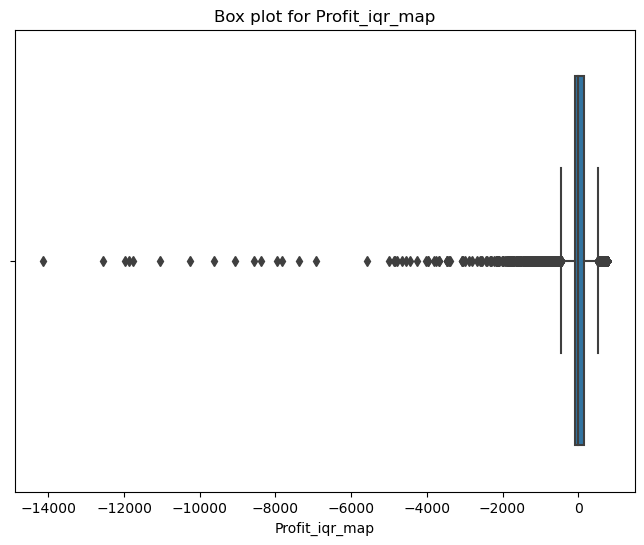

In [71]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.boxplot(x=df['Profit_iqr_map'])
plt.title('Box plot for Profit_iqr_map')
plt.show()

In [72]:
#Mapping with mode
mode=df['Profit'].mode()[0]
df["Profit_iqr_mm"] = np.where(df["Profit"].isin(o),mode,df['Profit'])

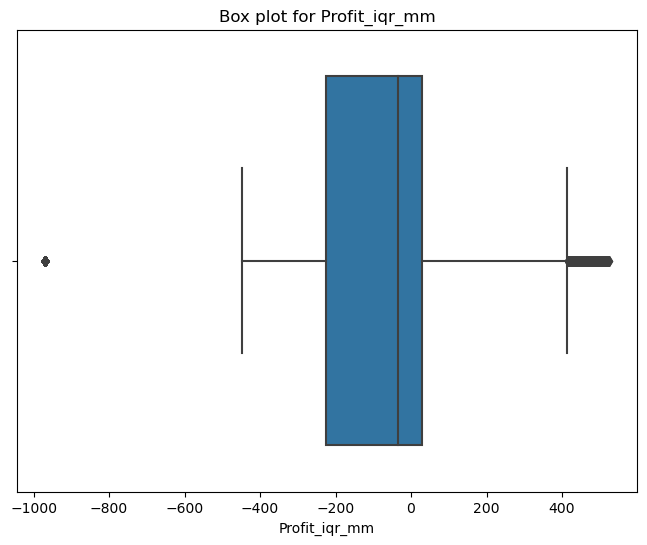

In [73]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.boxplot(x=df['Profit_iqr_mm'])
plt.title('Box plot for Profit_iqr_mm')
plt.show()

C:\Users\supri\AppData\Local\Temp\ipykernel_5400\466929508.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(x=df['Profit_iqr_mm'])


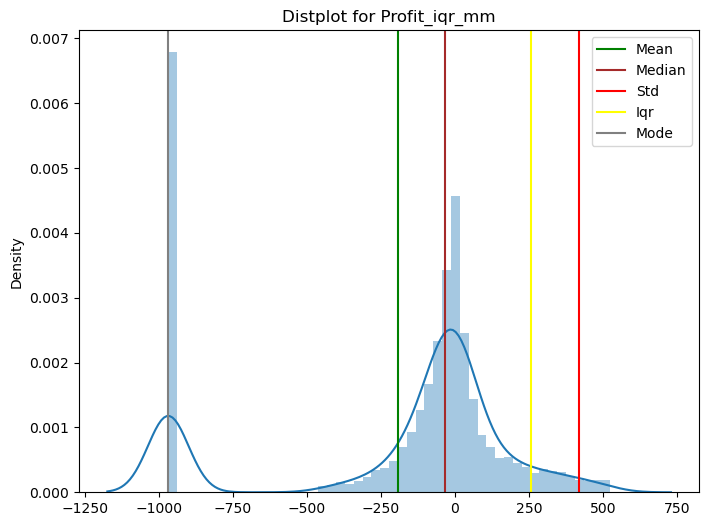

In [74]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.distplot(x=df['Profit_iqr_mm'])
mean=df['Profit_iqr_mm'].mean()
ax.axvline(mean,color='green',label='Mean')
median=df['Profit_iqr_mm'].median()
ax.axvline(median,color='brown',label='Median')
std=df['Profit_iqr_mm'].std()
ax.axvline(std,color='red',label='Std')
q1, q3 = df['Profit_iqr_mm'].quantile([0.25, 0.75])
iqr=q3-q1
ax.axvline(iqr,color='yellow',label='Iqr')
mode=df['Profit_iqr_mm'].mode()[0]
ax.axvline(mode,color='grey',label='Mode')
ax.legend()
plt.title('Distplot for Profit_iqr_mm')
plt.show()

In [75]:
#Lets try sqrt transform since its left skewed
df['Profit_iqr_mm_sqrt']=df['Profit_iqr_mm'].apply(lambda x: np.sqrt(x))

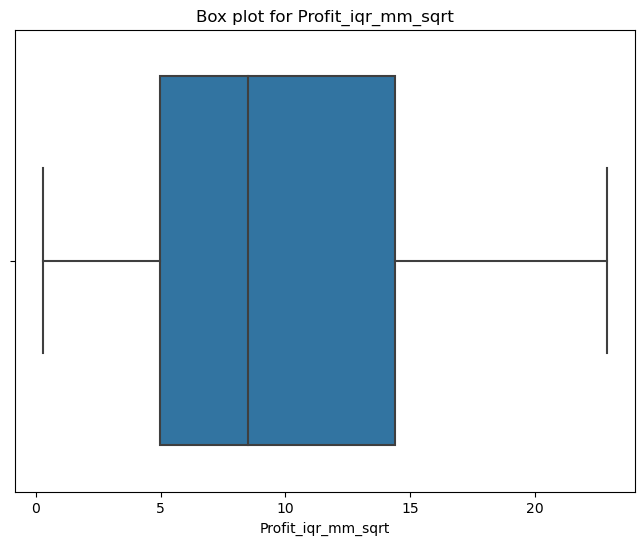

In [76]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.boxplot(x=df['Profit_iqr_mm_sqrt'])
plt.title('Box plot for Profit_iqr_mm_sqrt')
plt.show()

C:\Users\supri\AppData\Local\Temp\ipykernel_5400\3312272603.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(x=df['Profit_iqr_mm_sqrt'])


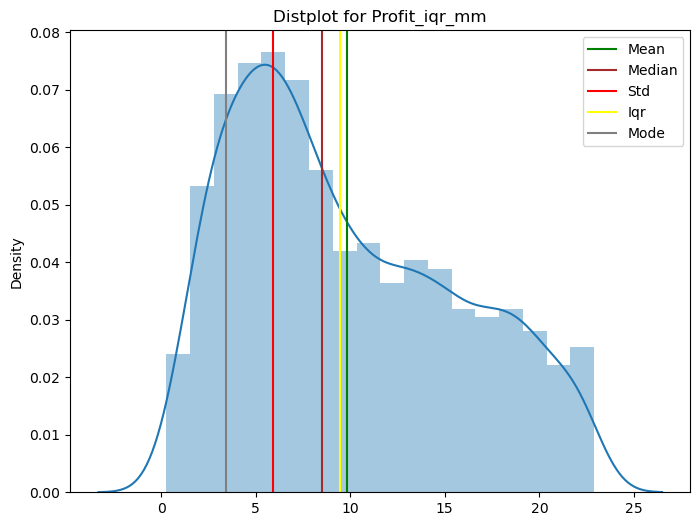

In [77]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.distplot(x=df['Profit_iqr_mm_sqrt'])
mean=df['Profit_iqr_mm_sqrt'].mean()
ax.axvline(mean,color='green',label='Mean')
median=df['Profit_iqr_mm_sqrt'].median()
ax.axvline(median,color='brown',label='Median')
std=df['Profit_iqr_mm_sqrt'].std()
ax.axvline(std,color='red',label='Std')
q1, q3 = df['Profit_iqr_mm_sqrt'].quantile([0.25, 0.75])
iqr=q3-q1
ax.axvline(iqr,color='yellow',label='Iqr')
mode=df['Profit_iqr_mm_sqrt'].mode()[0]
ax.axvline(mode,color='grey',label='Mode')
ax.legend()
plt.title('Distplot for Profit_iqr_mm')
plt.show()

In [78]:
#Lets check the skewness
df[['Profit','Profit_log','Profit_iqr_map','Profit_iqr_mm','Profit_iqr_mm_sqrt']].skew().sort_values()

Profit_iqr_map       -9.183244
Profit_iqr_mm        -1.025747
Profit_log            0.084382
Profit_iqr_mm_sqrt    0.484078
Profit                3.718699
dtype: float64

In [79]:
df.isna().sum()

Row ID                     0
Order ID                   0
Order Date                 0
Order Priority             0
Order Quantity             0
Sales                      0
Discount                   0
Ship Mode                  0
Profit                     0
Unit Price                 0
Shipping Cost              0
Customer Name              0
Province                   0
Region                     0
Customer Segment           0
Product Category           0
Product Sub-Category       0
Product Name               0
Product Container          0
Product Base Margin        0
Ship Date                  0
Order Month                0
Order Year                 0
Order Day                  0
UP_log                     0
UP_bcx                     0
Sales_log                  0
Sales_bcx                  0
Sales_bcx_map              0
Sales_bcx_mwm              0
Sales_bcx_mwz              0
Profit_log                 0
Profit_iqr_map             0
Profit_iqr_mm              0
Profit_iqr_mm_

In [ ]:
#After sqrt transform all negative values got converted to Nan, lets try some other method

In [80]:
from sklearn.preprocessing import QuantileTransformer

# create a new column for transformed data
df['Profit_qt'] = df['Profit']

# create a QuantileTransformer object
qt = QuantileTransformer(output_distribution='uniform')

# fit and transform the data using the QuantileTransformer object
df['Profit_qt'] = qt.fit_transform(df[['Profit_qt']])

# shift values back to their original range
df['Profit_qt'] = df['Profit_qt'] * (df['Profit'].max() - df['Profit'].min()) + df['Profit'].min()


In [81]:
df[['Profit','Profit_qt']].sort_values('Profit')

Profit     Profit_qt
8313 -14140.7016 -14140.701600
7677 -12557.9976 -14128.187467
7968 -11984.3979 -14123.652125
5913 -11861.4600 -14122.680079
4661 -11769.1700 -14121.950360
...          ...           ...
7906  12606.8100  27182.602450
6995  12748.8600  27182.972669
4767  13340.2600  27184.514010
5609  14440.3900  27187.381234
4674  27220.6900  27220.690000

[8336 rows x 2 columns]

In [82]:
df['Profit_qt'].corr(df['Profit']) #if Profit increases then Profit_qt also increases...just checking if there's any deviation

0.5545379414846693

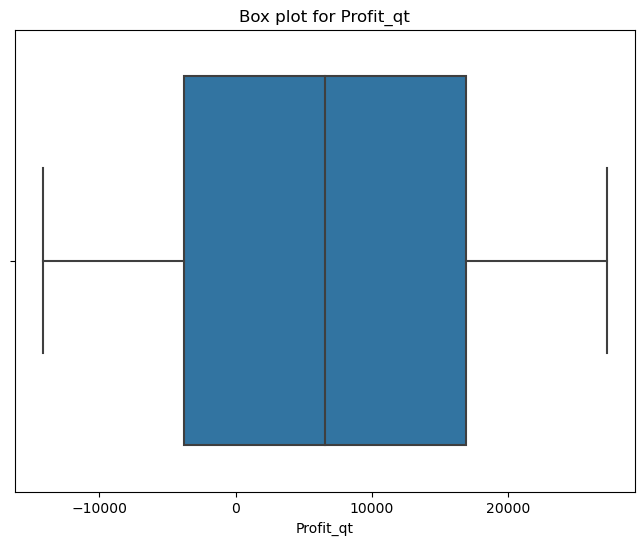

In [83]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.boxplot(x=df['Profit_qt'])
plt.title('Box plot for Profit_qt')
plt.show()

In [84]:
df[['Profit_qt','Profit']].skew().sort_values()

Profit_qt    0.000045
Profit       3.718699
dtype: float64

C:\Users\supri\AppData\Local\Temp\ipykernel_5400\4063741919.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(x=df['Profit_qt'])


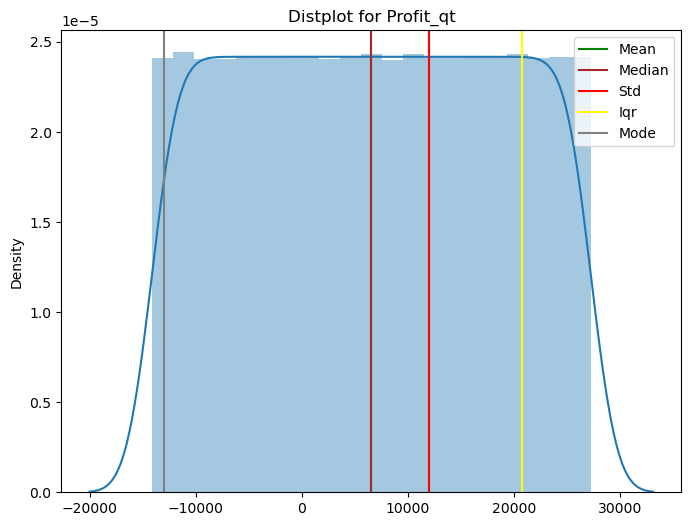

In [85]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.distplot(x=df['Profit_qt'])
mean=df['Profit_qt'].mean()
ax.axvline(mean,color='green',label='Mean')
median=df['Profit_qt'].median()
ax.axvline(median,color='brown',label='Median')
std=df['Profit_qt'].std()
ax.axvline(std,color='red',label='Std')
q1, q3 = df['Profit_qt'].quantile([0.25, 0.75])
iqr=q3-q1
ax.axvline(iqr,color='yellow',label='Iqr')
mode=df['Profit_qt'].mode()[0]
ax.axvline(mode,color='grey',label='Mode')
ax.legend()
plt.title('Distplot for Profit_qt')
plt.show()

In [86]:
q1, q3 = df['Profit_qt'].quantile([0.25, 0.75])
iqr_val = q3 - q1
print('Mean:',df['Profit_qt'].mean())
print('Median:',df['Profit_qt'].median())
print('Std:',df['Profit_qt'].std())
print('InterquartileRange:',iqr_val)
print('Skewness:', "{:.6f}".format(df['Profit_qt'].skew()))
print('Kurtosis:',df['Profit_qt'].kurt() )

Mean: 6540.0870559586465
Median: 6531.13169084219
Std: 11942.10702960751
InterquartileRange: 20690.95641974267
Skewness: 0.000045
Kurtosis: -1.200025196633336


In [90]:
#Lets check the correlation between Profit and Sales
print("Correlation of Profit with Sales before transform:",
      df['Profit'].corr(df['Sales']))
print("Correlation of Profit with Sales_bcx_mwm after log transform:",
      df['Profit_log'].corr(df['Sales_bcx_mwm']))
print("Correlation of Profit with Sales_bcx_mwm mapping IQR method generated outlier with 90th and 10th percentile:",
      df['Profit_iqr_map'].corr(df['Sales_bcx_mwm']))
print("Correlation of Profit with Sales_bcx_mwm after boxcox transform and mapping IQR method generated outlier with mode:",
      df['Profit_iqr_mm'].corr(df['Sales_bcx_mwm']))
print("Correlation of Profit with Sales_bcx_mwm after boxcox transform and mapping IQR method generated outlier with mode and then applying sqrt transform:",
      df['Profit_iqr_mm_sqrt'].corr(df['Sales_bcx_mwm']))
print("Correlation of Profit with Sales_bcx_mwm after quantile transform:",
      df['Profit_qt'].corr(df['Sales_bcx_mwm']))

Correlation of Profit with Sales before transform: 0.5846639208893858
Correlation of Profit with Sales_bcx_mwm after log transform: 0.3614045816816759
Correlation of Profit with Sales_bcx_mwm mapping IQR method generated outlier with 90th and 10th percentile: 0.08998305366157129
Correlation of Profit with Sales_bcx_mwm after boxcox transform and mapping IQR method generated outlier with mode: -0.5249293790378268
Correlation of Profit with Sales_bcx_mwm after boxcox transform and mapping IQR method generated outlier with mode and then applying sqrt transform: 0.7278593722836767
Correlation of Profit with Sales_bcx_mwm after quantile transform: 0.31969097318208195


In [88]:
#Lets check the correlation between Profit and Unit Price
print("Correlation of Profit with Unit Price before transform:",
      df['Profit'].corr(df['Unit Price']))
print("Correlation of Profit with UP_bcx after log transform:",
      df['Profit_log'].corr(df['UP_bcx']))
print("Correlation of Profit with UP_bcx mapping IQR method generated outlier with 90th and 10th percentile:",
      df['Profit_iqr_map'].corr(df['UP_bcx']))
print("Correlation of Profit with UP_bcx after boxcox transform and mapping IQR method generated outlier with mode:",
      df['Profit_iqr_mm'].corr(df['UP_bcx']))
print("Correlation of Profit with UP_bcx after boxcox transform and mapping IQR method generated outlier with mode and then applying sqrt transform:",
      df['Profit_iqr_mm_sqrt'].corr(df['UP_bcx']))
print("Correlation of Profit with UP_bcx after quantile transform:",
      df['Profit_qt'].corr(df['UP_bcx']))

Correlation of Profit with Unit Price before transform: -0.010908036390954088
Correlation of Profit with UP_bcx after log transform: 0.2468497040604188
Correlation of Profit with UP_bcx mapping IQR method generated outlier with 90th and 10th percentile: 0.005999825932883626
Correlation of Profit with UP_bcx after boxcox transform and mapping IQR method generated outlier with mode: -0.4994291905604101
Correlation of Profit with UP_bcx after boxcox transform and mapping IQR method generated outlier with mode and then applying sqrt transform: 0.6389069826802778
Correlation of Profit with UP_bcx after quantile transform: 0.21754373033586621


In [92]:
#Lets check correlation between Sales and Unit Price
#Lets check the correlation now if any increase
print("Correlation of Sales with Unit Price before transform:",
      df['Sales'].corr(df['Unit Price']))
print("Correlation of Sales with Unit Price after log transform:",
      df['Sales_log'].corr(df['UP_bcx']))
print("Correlation of Sales with Unit Price after boxcox transform:",
      df['Sales_bcx'].corr(df['UP_bcx']))
print("Correlation of Sales with Unit Price after boxcox transform and mapping IQR method generated outlier with mode:",
      df['Sales_bcx_mwm'].corr(df['UP_bcx']))
print("Correlation of Sales with Unit Price after boxcox transform and mapping IQR method generated outlier with 90th and 10th percentile:",
      df['Sales_bcx_map'].corr(df['UP_bcx']))

Correlation of Sales with Unit Price before transform: 0.603025683980307
Correlation of Sales with Unit Price after log transform: 0.8660489144199798
Correlation of Sales with Unit Price after boxcox transform: 0.8646584338080138
Correlation of Sales with Unit Price after boxcox transform and mapping IQR method generated outlier with mode: 0.8634298635375354
Correlation of Sales with Unit Price after boxcox transform and mapping IQR method generated outlier with 90th and 10th percentile: 0.8644736984789999


*Let's retain both Profit and Profit_qt column and check how the model performs*

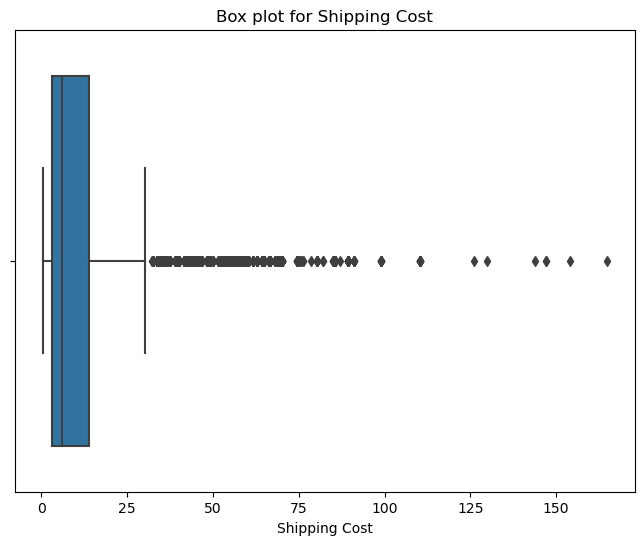

In [93]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.boxplot(x=df['Shipping Cost'])
plt.title('Box plot for Shipping Cost')
plt.show()

C:\Users\supri\AppData\Local\Temp\ipykernel_5400\1531890801.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(x=df['Shipping Cost'])


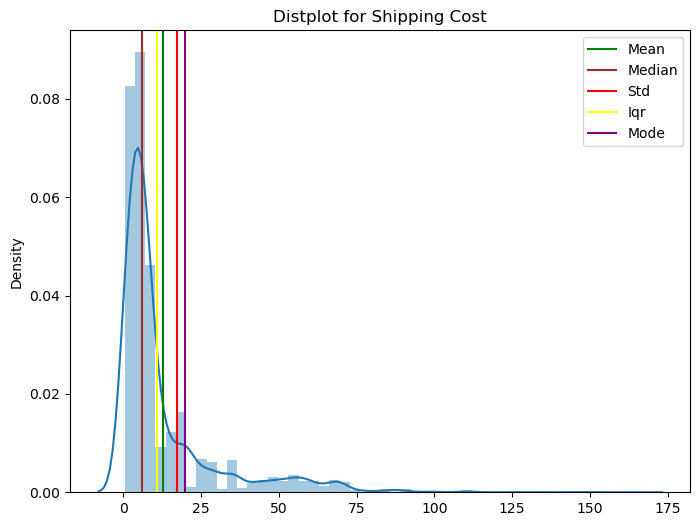

In [94]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.distplot(x=df['Shipping Cost'])
mean=df['Shipping Cost'].mean()
ax.axvline(mean,color='green',label='Mean')
median=df['Shipping Cost'].median()
ax.axvline(median,color='brown',label='Median')
std=df['Shipping Cost'].std()
ax.axvline(std,color='red',label='Std')
q1, q3 = df['Shipping Cost'].quantile([0.25, 0.75])
iqr=q3-q1
ax.axvline(iqr,color='yellow',label='Iqr')
mode=df['Shipping Cost'].mode()[0]
ax.axvline(mode,color='purple',label='Mode')
ax.legend()
plt.title('Distplot for Shipping Cost')
plt.show()

In [95]:
#Since its right skewed, lets apply log and boxcox transform and check
df['SP_log']=df['Shipping Cost'].apply(lambda x: np.log(x))
values=df['Shipping Cost'].values
transformed_values,l=boxcox(values)
df['SP_bcx']=transformed_values

Text(0.5, 1.0, 'histplot for SP_bcx')

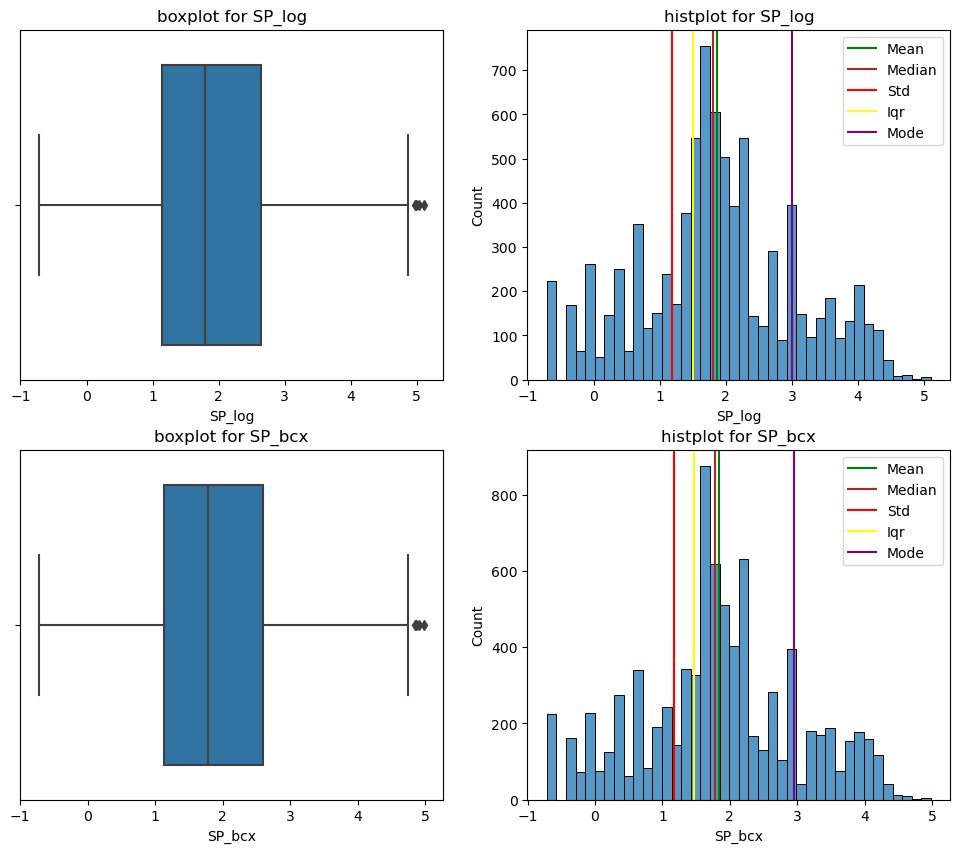

In [96]:
fig=plt.figure(figsize=(12,10))

ax1=plt.subplot(221)
plot1=sns.boxplot(x=df['SP_log'])
ax1.set_title('boxplot for SP_log')

ax2=plt.subplot(222)
mean=df['SP_log'].mean()
ax2.axvline(mean,color='green',label='Mean')
median=df['SP_log'].median()
ax2.axvline(median,color='brown',label='Median')
std=df['SP_log'].std()
ax2.axvline(std,color='red',label='Std')
q1, q3 = df['SP_log'].quantile([0.25, 0.75])
iqr=q3-q1
ax2.axvline(iqr,color='yellow',label='Iqr')
mode=df['SP_log'].mode()[0]
ax2.axvline(mode,color='purple',label='Mode')
ax2.legend()
plot2=sns.histplot(x=df['SP_log'])
ax2.set_title('histplot for SP_log')

ax3=plt.subplot(223)
plot3=sns.boxplot(x=df['SP_bcx'])
ax3.set_title('boxplot for SP_bcx')

ax4=plt.subplot(224)
mean=df['SP_bcx'].mean()
ax4.axvline(mean,color='green',label='Mean')
median=df['SP_bcx'].median()
ax4.axvline(median,color='brown',label='Median')
std=df['SP_bcx'].std()
ax4.axvline(std,color='red',label='Std')
q1, q3 = df['SP_bcx'].quantile([0.25, 0.75])
iqr=q3-q1
ax4.axvline(iqr,color='yellow',label='Iqr')
mode=df['SP_bcx'].mode()[0]
ax4.axvline(mode,color='purple',label='Mode')
ax4.legend()
plot4=sns.histplot(x=df['SP_bcx'])
ax4.set_title('histplot for SP_bcx')

we can observe few outliers

In [97]:
df[['Shipping Cost','SP_log','SP_bcx']].skew()

Shipping Cost    2.588632
SP_log           0.030509
SP_bcx           0.001161
dtype: float64

In [98]:
#As we saw few outliers, lets handle them and check
Q1 = np.percentile(df['SP_bcx'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['SP_bcx'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print("75th quartile range",Q3)
print("25th quartile range",Q1)
print('InterquartileRange:',IQR)
o_iqr=[]
for i in df['SP_bcx'] : 
        if (i<(Q1 - 1.5 * IQR) or i>(Q3 + 1.5 * IQR)):
            o_iqr.append(i)
print(o_iqr)

o_zscore = []
threshold = 3  #Can be set on observations done
mean = np.mean(df['SP_bcx'])
std = df['SP_bcx'].std()
for i in df['SP_bcx']:
    z_score = (i-mean)/std
    if (np.abs(z_score) > threshold):
        o_zscore.append(i)
print(o_zscore)

75th quartile range 2.6048944509868877
25th quartile range 1.137901253287181
InterquartileRange: 1.4669931976997066
[4.872439578458238, 4.916717332117403, 4.8500933487934725, 4.872439578458238, 4.980100417255139]
[]


C:\Users\supri\AppData\Local\Temp\ipykernel_5400\792477853.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['SP_bcx'], 25,
C:\Users\supri\AppData\Local\Temp\ipykernel_5400\792477853.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['SP_bcx'], 75,


In [99]:
#Lets map the outliers with mode value
p90=np.percentile(df['SP_bcx'],90)
p10=np.percentile(df['SP_bcx'],10)
print('p90:',p90)
print('p10:',p10)
m=df['SP_bcx'].mode()[0]
print('m:',m)

p90: 3.4947866362599163
p10: 0.2229024154523654
m: 2.9521720930337123


In [100]:
df['SP_bcx_mwp']=np.where(df['SP_bcx'].isin(o_iqr),P90,df['SP_bcx'])

In [101]:
df["SP_bcx_mwm"] = np.where(df['SP_bcx'].isin(o_iqr),m,df['SP_bcx'])

Text(0.5, 1.0, 'histplot for SP_bcx_mwm')

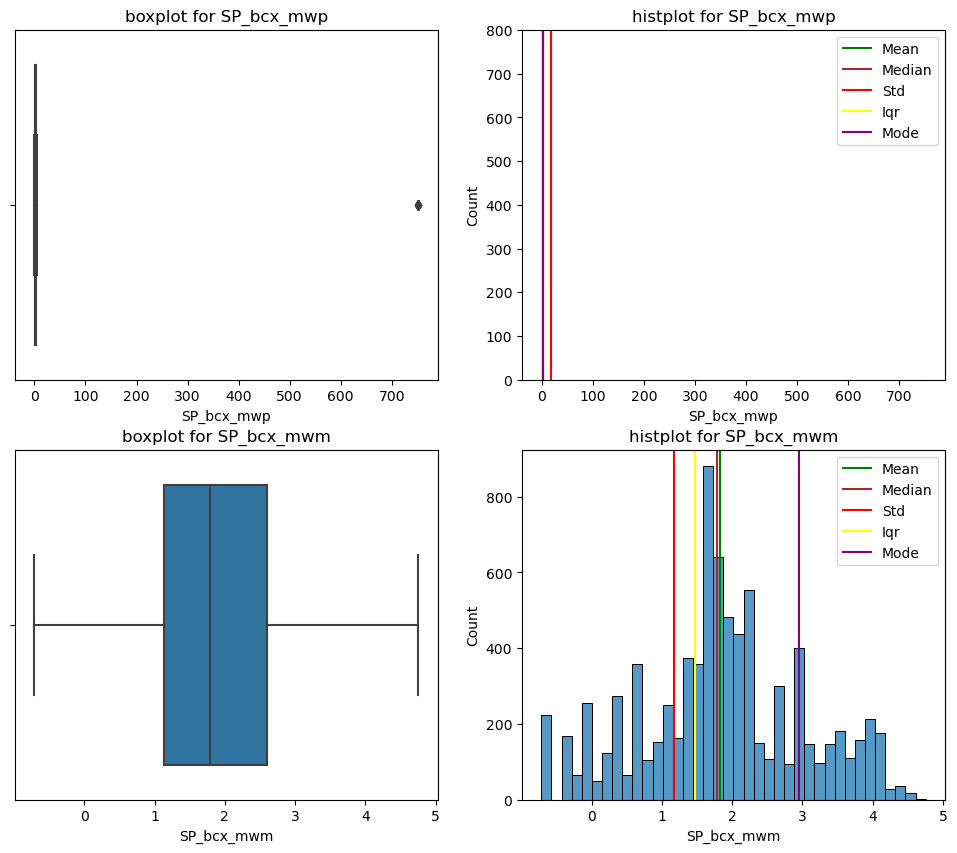

In [102]:
fig=plt.figure(figsize=(12,10))

ax1=plt.subplot(221)
plot1=sns.boxplot(x=df['SP_bcx_mwp'])
ax1.set_title('boxplot for SP_bcx_mwp')

ax2=plt.subplot(222)
mean=df['SP_bcx_mwp'].mean()
ax2.axvline(mean,color='green',label='Mean')
median=df['SP_bcx_mwp'].median()
ax2.axvline(median,color='brown',label='Median')
std=df['SP_bcx_mwp'].std()
ax2.axvline(std,color='red',label='Std')
q1, q3 = df['SP_bcx_mwp'].quantile([0.25, 0.75])
iqr=q3-q1
ax2.axvline(iqr,color='yellow',label='Iqr')
mode=df['SP_bcx_mwp'].mode()[0]
ax2.axvline(mode,color='purple',label='Mode')
ax2.legend()
plot2=sns.histplot(x=df['SP_bcx_mwp'])
ax2.set_title('histplot for SP_bcx_mwp')

ax3=plt.subplot(223)
plot3=sns.boxplot(x=df['SP_bcx_mwm'])
ax3.set_title('boxplot for SP_bcx_mwm')

ax4=plt.subplot(224)
mean=df['SP_bcx_mwm'].mean()
ax4.axvline(mean,color='green',label='Mean')
median=df['SP_bcx_mwm'].median()
ax4.axvline(median,color='brown',label='Median')
std=df['SP_bcx_mwm'].std()
ax4.axvline(std,color='red',label='Std')
q1, q3 = df['SP_bcx_mwm'].quantile([0.25, 0.75])
iqr=q3-q1
ax4.axvline(iqr,color='yellow',label='Iqr')
mode=df['SP_bcx_mwm'].mode()[0]
ax4.axvline(mode,color='purple',label='Mode')
ax4.legend()
plot4=sns.histplot(x=df['SP_bcx_mwm'])
ax4.set_title('histplot for SP_bcx_mwm')

In [103]:
df[['Shipping Cost','SP_log','SP_bcx','SP_bcx_mwm','SP_bcx_mwp']].skew()

Shipping Cost     2.588632
SP_log            0.030509
SP_bcx            0.001161
SP_bcx_mwm       -0.006191
SP_bcx_mwp       40.556466
dtype: float64

In [104]:
#to check what happends if we map it with median
m=df['Shipping Cost'].median()
df["SP_bcx_mwmd"] = np.where(df['SP_bcx'].isin(o_iqr),m,df['SP_bcx'])

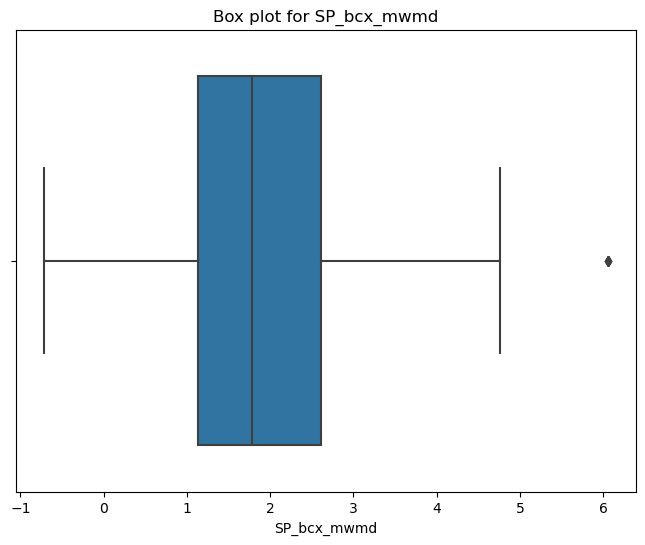

In [105]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.boxplot(x=df['SP_bcx_mwmd'])
plt.title('Box plot for SP_bcx_mwmd')
plt.show()

C:\Users\supri\AppData\Local\Temp\ipykernel_5400\1981742602.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(x=df['SP_bcx_mwmd'])


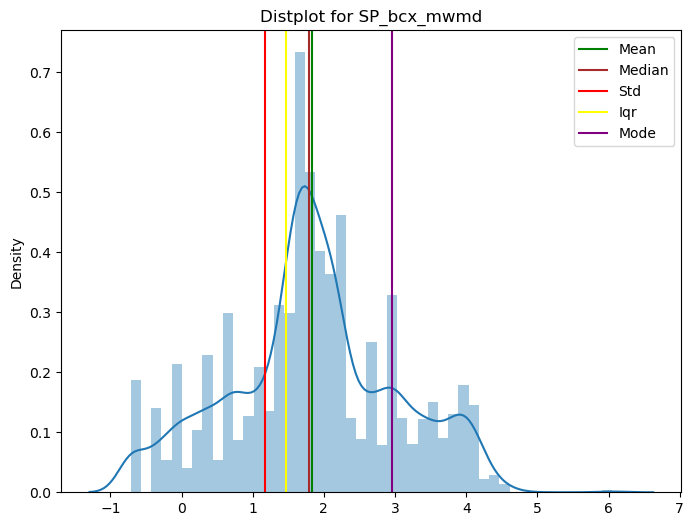

In [106]:
fig=plt.figure(figsize=(8,6))
ax=plt.subplot(1,1,1)
plot=sns.distplot(x=df['SP_bcx_mwmd'])
mean=df['SP_bcx_mwmd'].mean()
ax.axvline(mean,color='green',label='Mean')
median=df['SP_bcx_mwmd'].median()
ax.axvline(median,color='brown',label='Median')
std=df['SP_bcx_mwmd'].std()
ax.axvline(std,color='red',label='Std')
q1, q3 = df['SP_bcx_mwmd'].quantile([0.25, 0.75])
iqr=q3-q1
ax.axvline(iqr,color='yellow',label='Iqr')
mode=df['SP_bcx_mwmd'].mode()[0]
ax.axvline(mode,color='purple',label='Mode')
ax.legend()
plt.title('Distplot for SP_bcx_mwmd')
plt.show()

In [107]:
df[['Shipping Cost','SP_log','SP_bcx','SP_bcx_mwm','SP_bcx_mwp','SP_bcx_mwmd']].skew()

Shipping Cost     2.588632
SP_log            0.030509
SP_bcx            0.001161
SP_bcx_mwm       -0.006191
SP_bcx_mwp       40.556466
SP_bcx_mwmd       0.016656
dtype: float64

We can see correlation decreased after transformations

In [108]:
print("Correlation between Shipping cost and Profit after:",df['SP_bcx_mwmd'].corr(df['Profit_iqr_mm_sqrt']))
print("Correlation between Shipping cost and Profit before:",df['Shipping Cost'].corr(df['Profit_iqr_mm_sqrt']))
print("Correlation between Shipping cost and Profit before:",df['Shipping Cost'].corr(df['UP_bcx']))
print("Correlation between Shipping cost and Profit after:",df['SP_bcx_mwmd'].corr(df['UP_bcx']))
print("Correlation between Shipping cost and Profit before:",df['Shipping Cost'].corr(df['Sales_bcx_mwm']))
print("Correlation between Shipping cost and Profit after:",df['SP_bcx_mwmd'].corr(df['Sales_bcx_mwm']))

Correlation between Shipping cost and Profit after: 0.3384550772319311
Correlation between Shipping cost and Profit before: 0.20294608922991228
Correlation between Shipping cost and Profit before: 0.5461969690323896
Correlation between Shipping cost and Profit after: 0.662722564464134
Correlation between Shipping cost and Profit before: 0.507181194438828
Correlation between Shipping cost and Profit after: 0.5965080414434122


Text(0.5, 1.0, 'Boxplot for Discount')

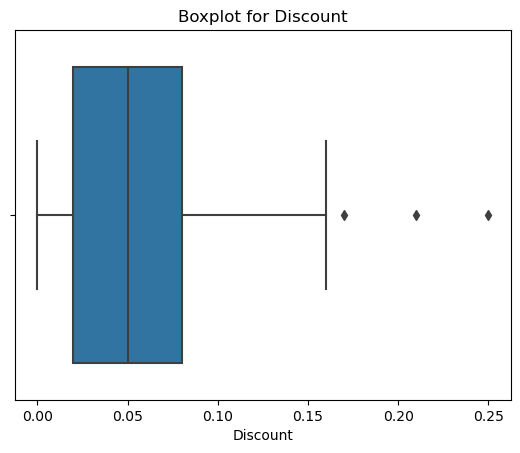

In [109]:
sns.boxplot(x=df['Discount'])
plt.title('Boxplot for Discount')

In [110]:
#after log transform
df['D_log']=df['Discount'].apply(lambda x : np.log(x))

Text(0.5, 1.0, 'Boxplot for D_log')

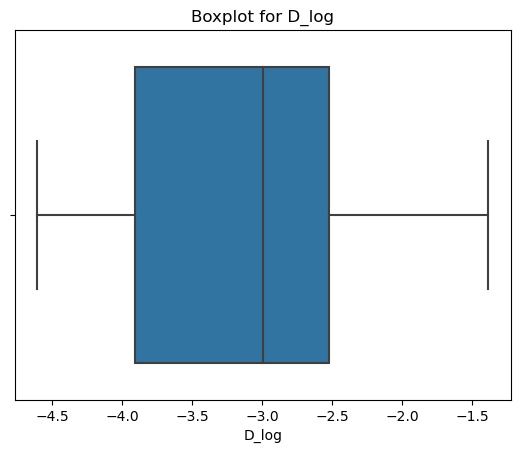

In [111]:
sns.boxplot(x=df['D_log'])
plt.title('Boxplot for D_log')

In [112]:
df['D_log'].skew() #presence of negative values and inf in D_log

nan

In [113]:
#Lets handle outliers and check
Q1 = np.percentile(df['Discount'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Discount'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print("75th quartile range",Q3)
print("25th quartile range",Q1)
print('InterquartileRange:',IQR)
o_iqr=[]
for i in df['Discount'] : 
        if (i<(Q1 - 1.5 * IQR) or i>(Q3 + 1.5 * IQR)):
            o_iqr.append(i)
print(o_iqr)

o_zscore = []
threshold = 2  #Can be set on observations done
mean = np.mean(df['Discount'])
std = df['Discount'].std()
for i in df['Discount']:
    z_score = (i-mean)/std
    if (np.abs(z_score) > threshold):
        o_zscore.append(i)
print(o_zscore)

75th quartile range 0.08
25th quartile range 0.02
InterquartileRange: 0.06
[0.25, 0.21, 0.17]
[0.25, 0.21, 0.17, 0.16]


C:\Users\supri\AppData\Local\Temp\ipykernel_5400\3930458260.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Discount'], 25,
C:\Users\supri\AppData\Local\Temp\ipykernel_5400\3930458260.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['Discount'], 75,


In [114]:
m=df['Discount'].mode()[0]
print('m:',m)

m: 0.01


In [115]:
df["D_mwm"] = np.where(df['Discount'].isin(o_zscore),m,df['Discount'])

Text(0.5, 1.0, 'Boxplot for D_mwm')

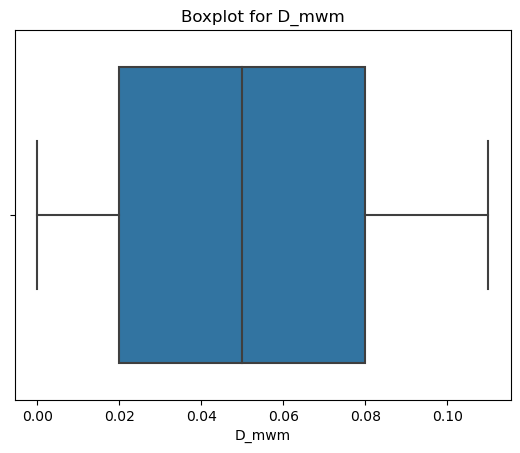

In [116]:
sns.boxplot(x=df['D_mwm'])
plt.title('Boxplot for D_mwm')

In [117]:
df[['Discount','D_mwm']].skew()

Discount    0.076052
D_mwm       0.027035
dtype: float64

In [118]:
print("correlation with sales before:",df['Discount'].corr(df['Sales_bcx_mwm']))
print("correlation with sales after:",df['D_mwm'].corr(df['Sales_bcx_mwm']))
print("correlation with profit before:",df['Discount'].corr(df['Profit_iqr_mm_sqrt']))
print("correlation with profit after:",df['D_mwm'].corr(df['Profit_iqr_mm_sqrt']))

correlation with sales before: -0.022435251673140057
correlation with sales after: -0.02163502342278498
correlation with profit before: -0.002385098978169205
correlation with profit after: -0.002385098978169205


C:\Users\supri\AppData\Local\Temp\ipykernel_5400\48011908.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c=df.corr()


<Axes: >

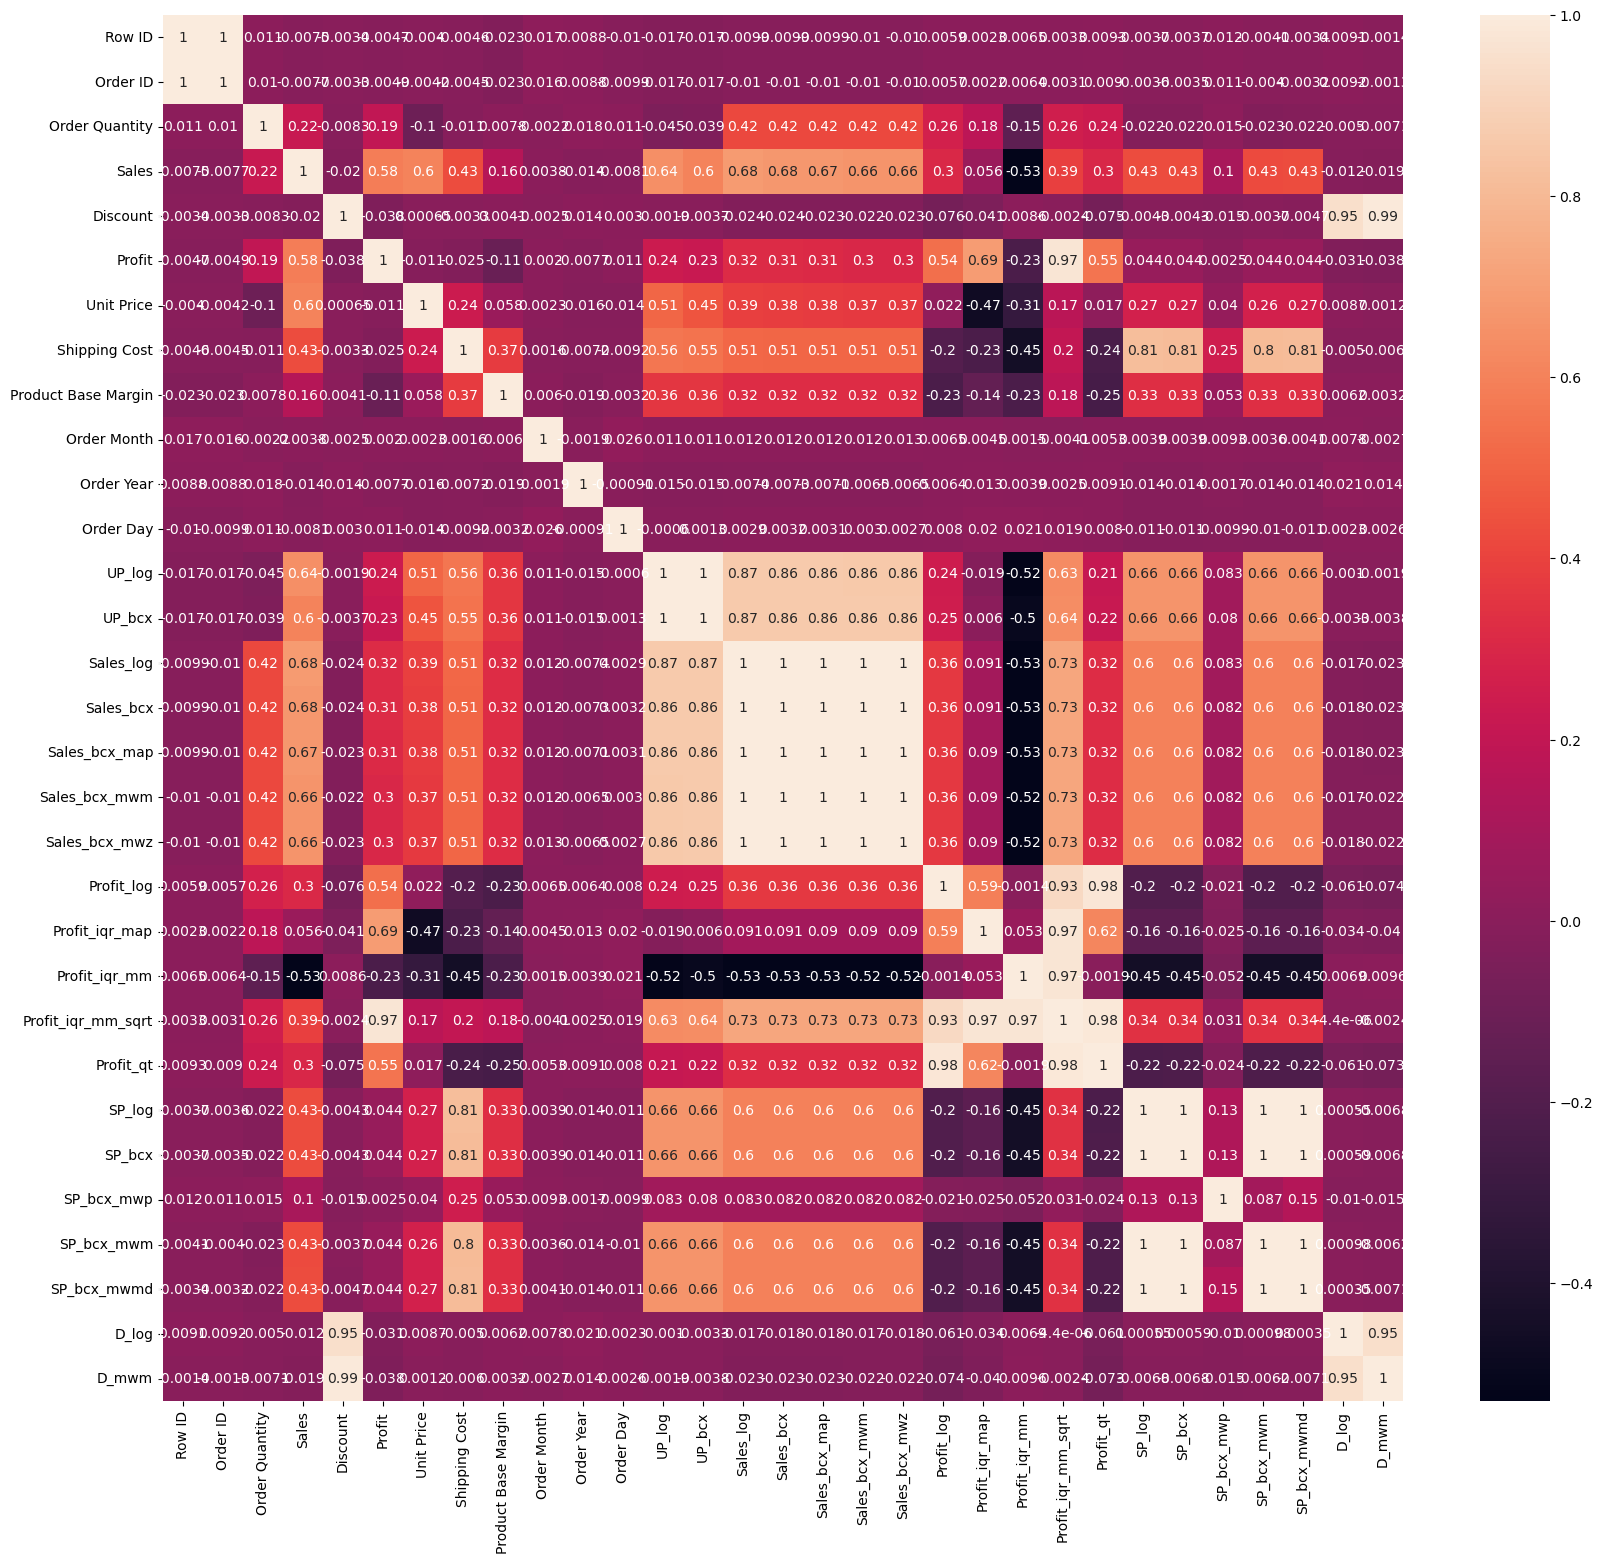

In [119]:
fig=plt.figure(figsize=(20,18))
c=df.corr()
sns.heatmap(c,annot=True)